In [114]:
import matplotlib.pyplot as plt

colors=['blue','red','green','yellow','black','purple','orange','pink','brown','cyan']

def plot_csv(x,y,acceleration_x,acceleration_y):

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.xlim(-1e11,1e11)
    plt.ylim(-1e11,1e11)
    plt.scatter(x, y, color= colors[:2], marker='o', alpha=0.5)
    # Add acceleration vectors
    plt.quiver(x, y, acceleration_x, acceleration_y, angles='xy', scale_units='xy', scale=1, color='red', label='Acceleration')
    plt.title('Scatter Plot of Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()



In [115]:
def read_csv(file_name):
    x = []
    y = []
    acceleration_x = []
    acceleration_y = []
    with open(file_name, 'r') as f:
        for line in f:
            if line == '\n':
                plot_csv(x,y,acceleration_x,acceleration_y)
                x = []
                y = []
                acceleration_x = []
                acceleration_y = []
                continue
            data = line.split(',')
            x.append(float(data[0]))
            y.append(float(data[1]))
            acceleration_x.append(float(data[2]))
            acceleration_y.append(float(data[3]))

            
    


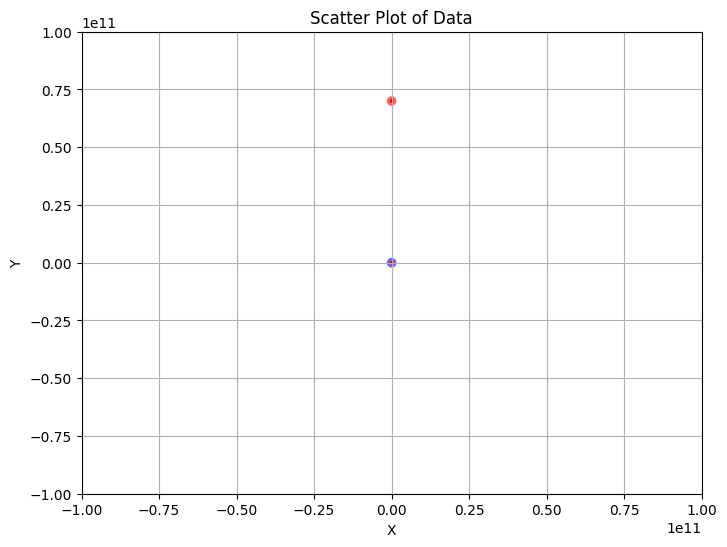

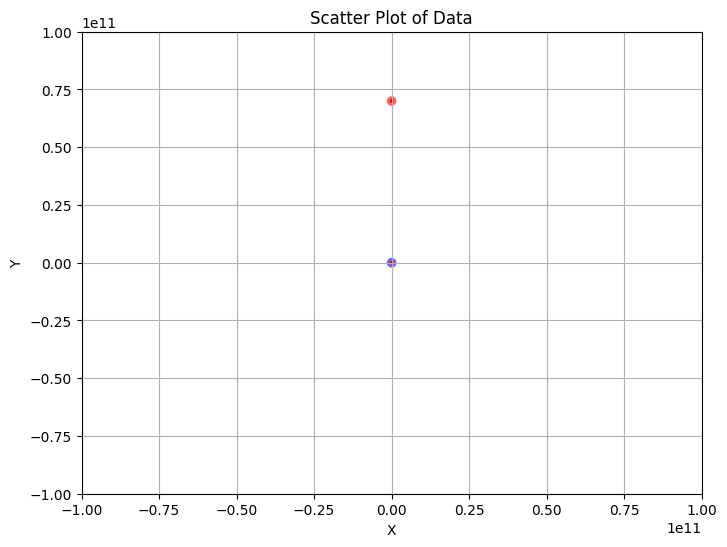

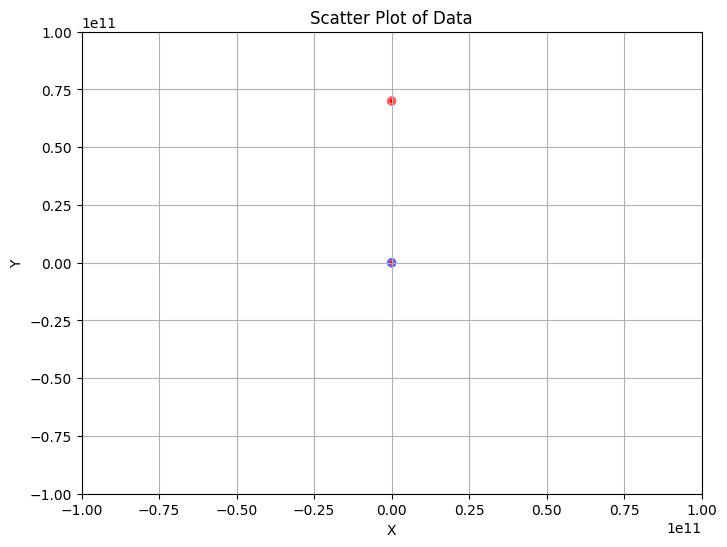

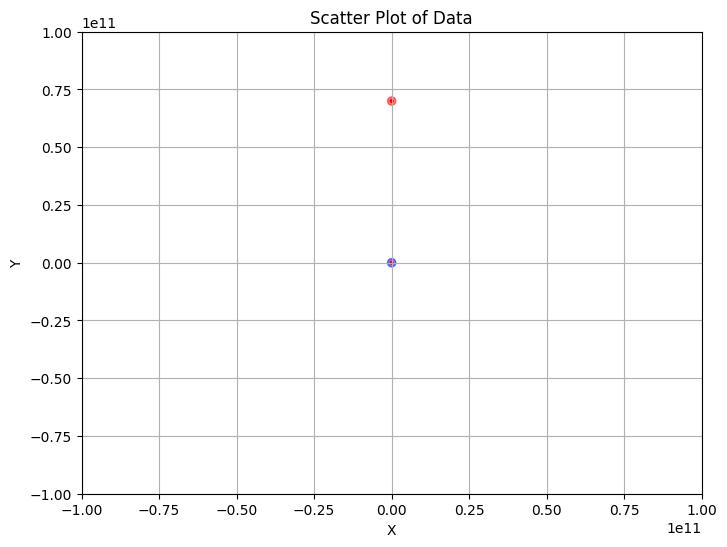

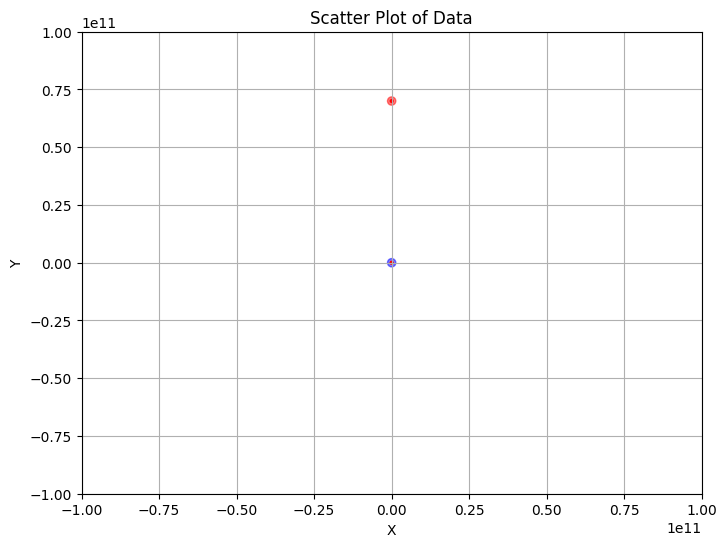

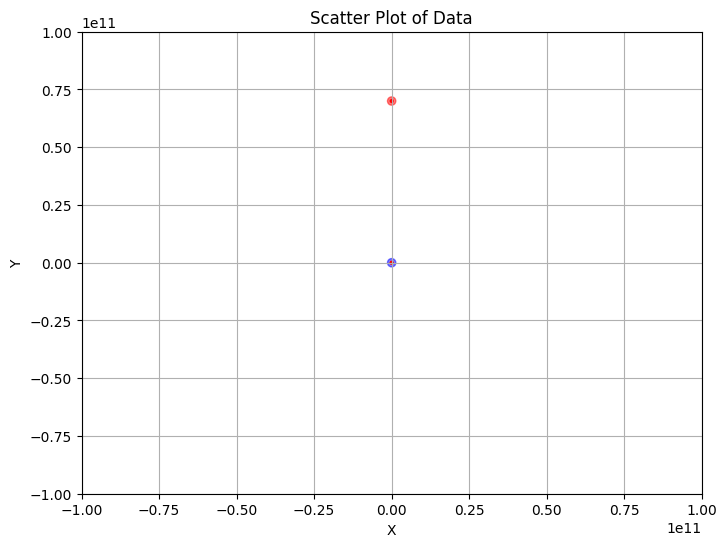

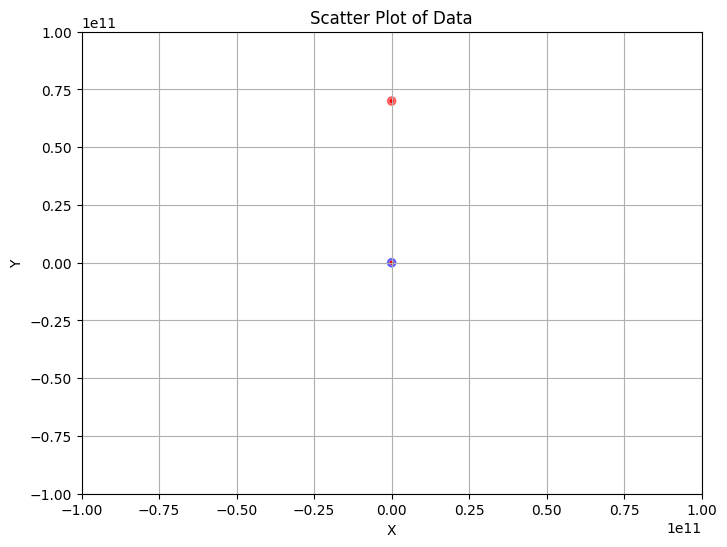

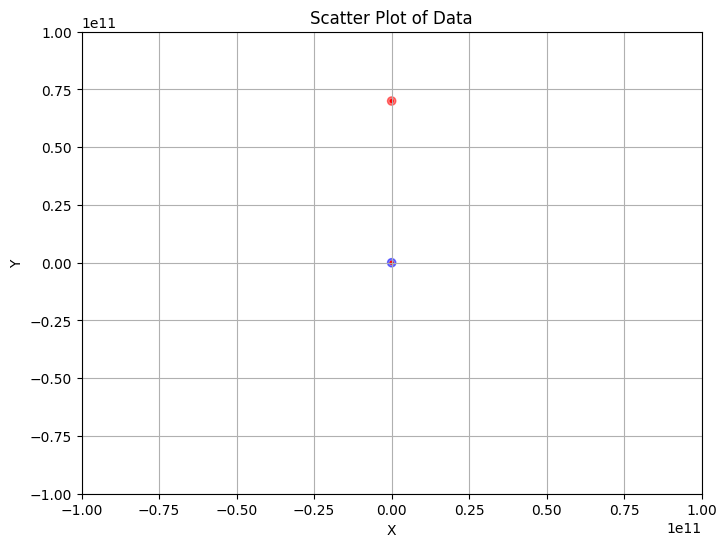

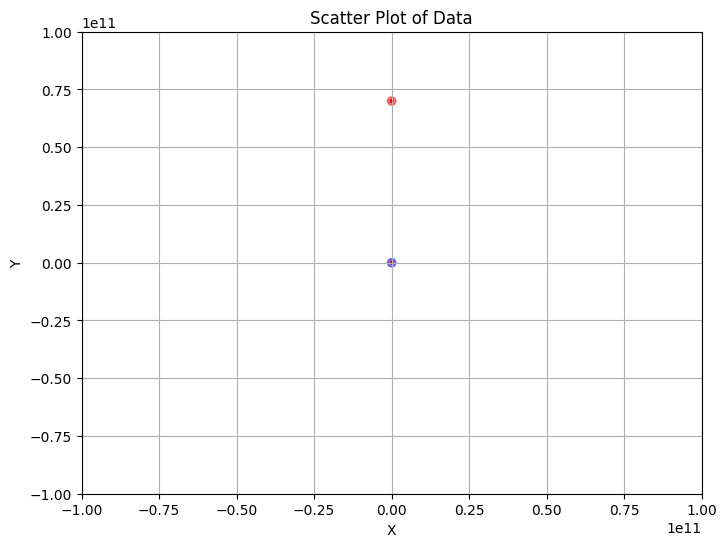

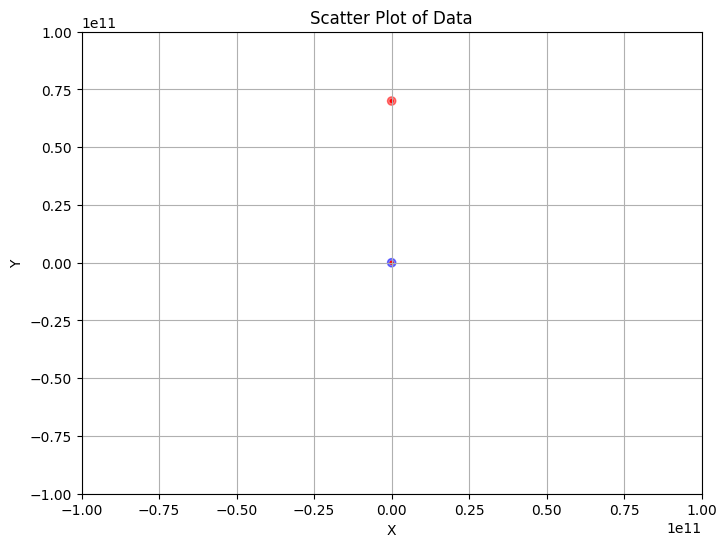

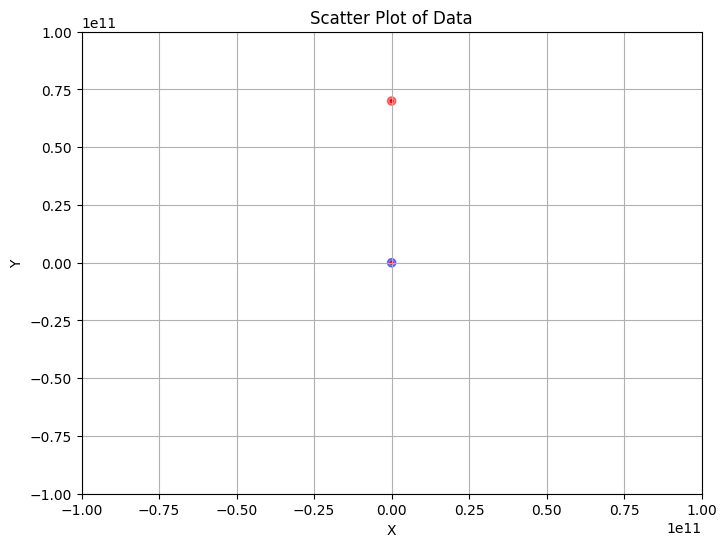

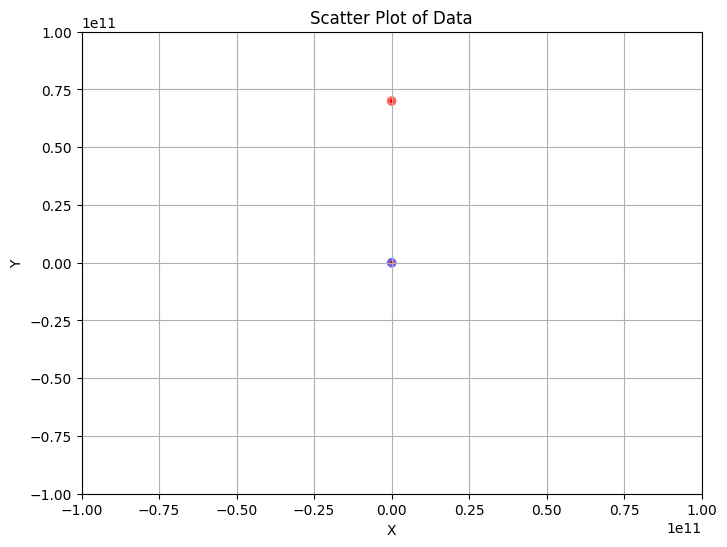

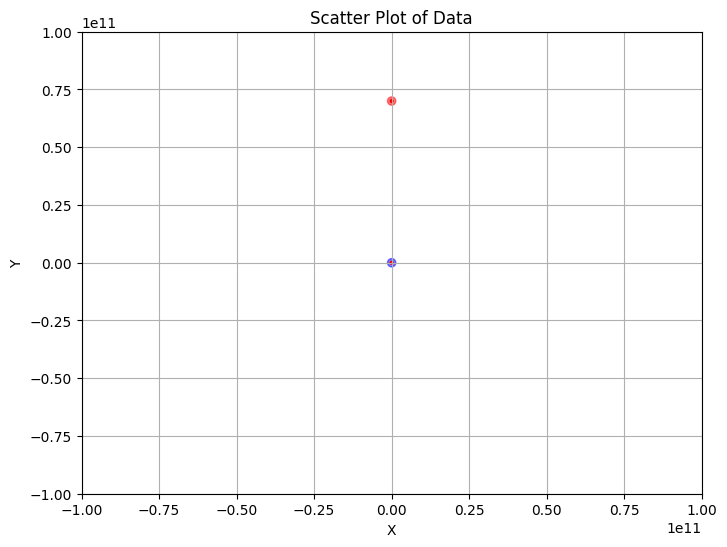

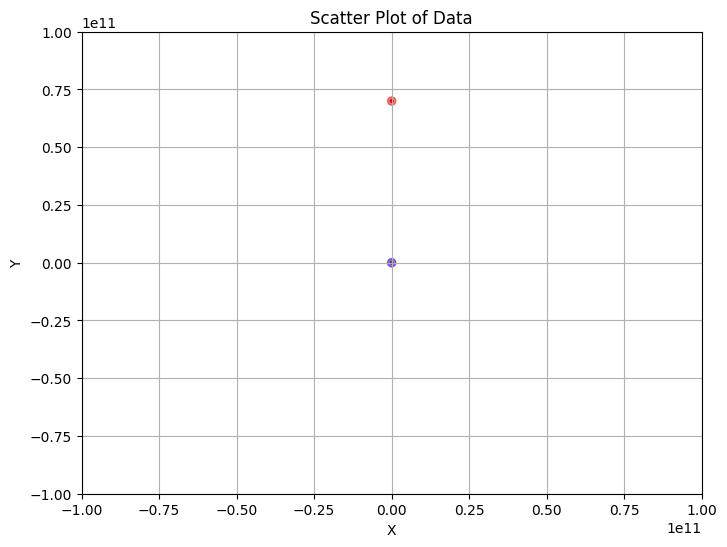

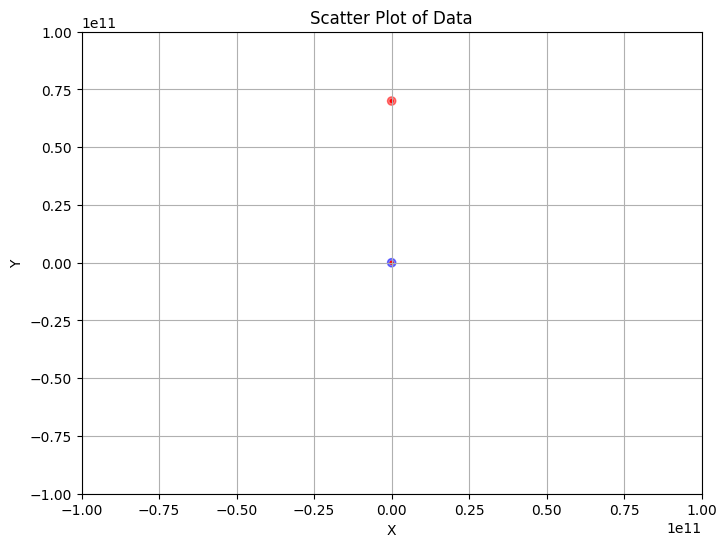

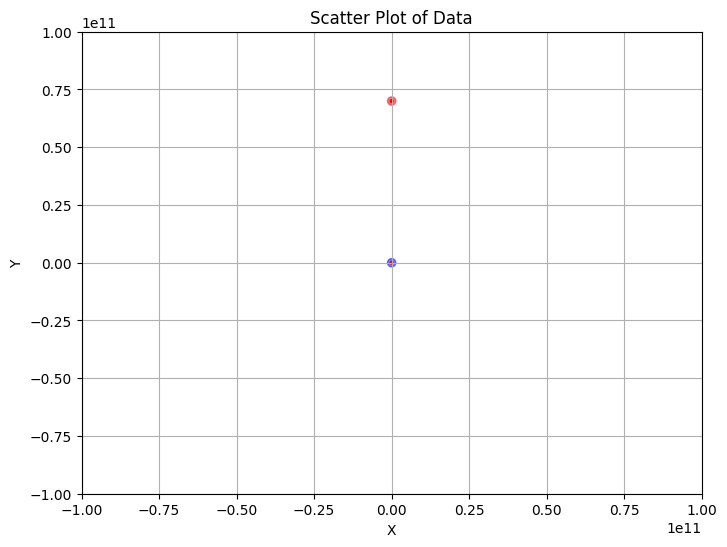

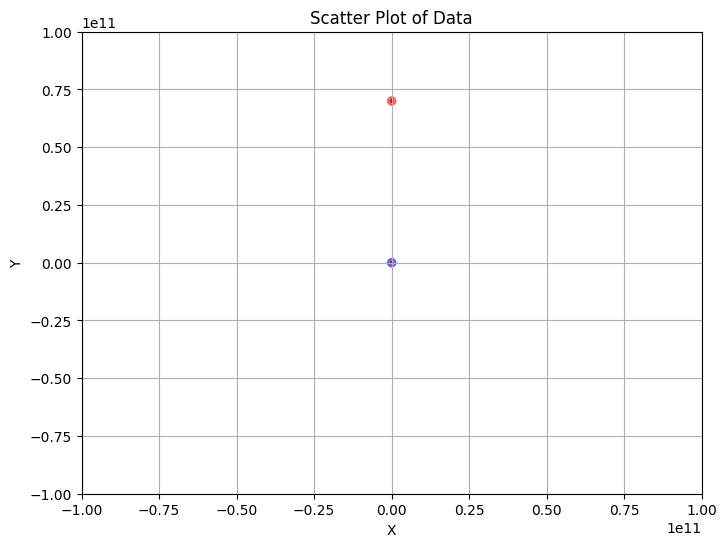

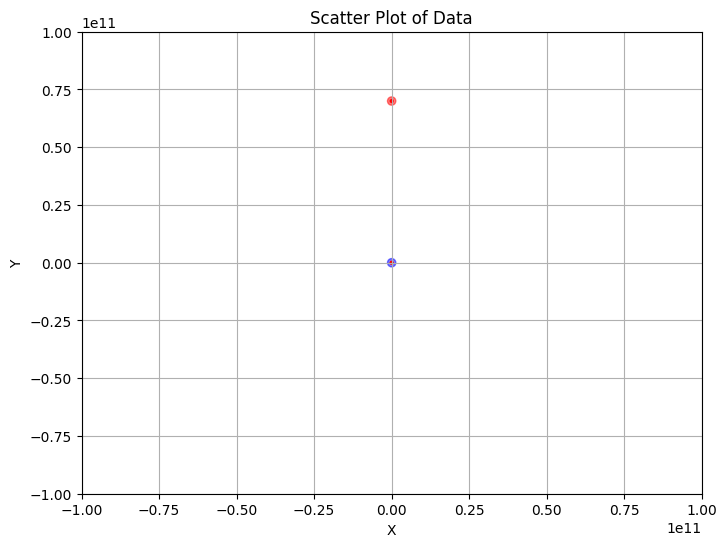

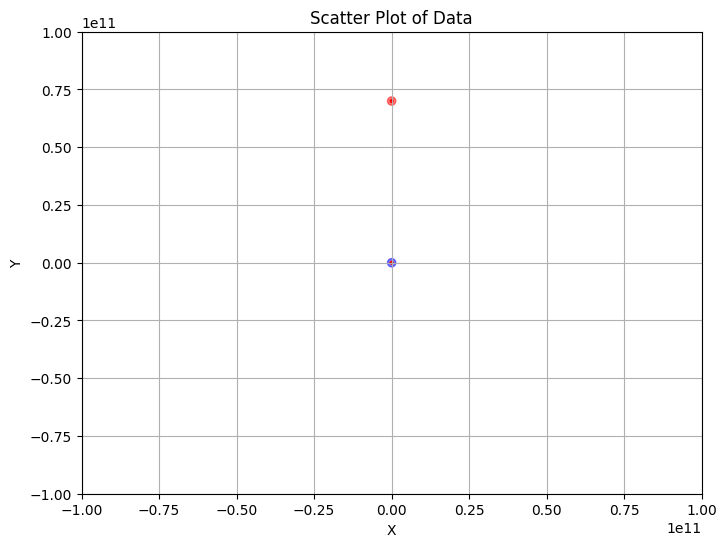

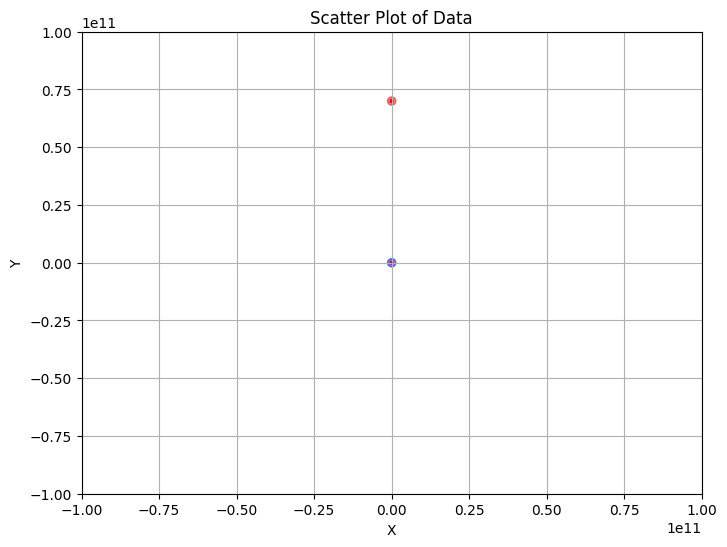

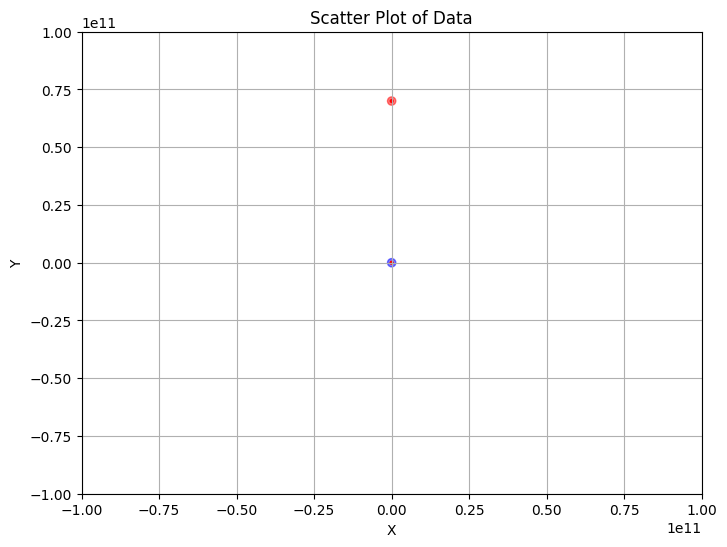

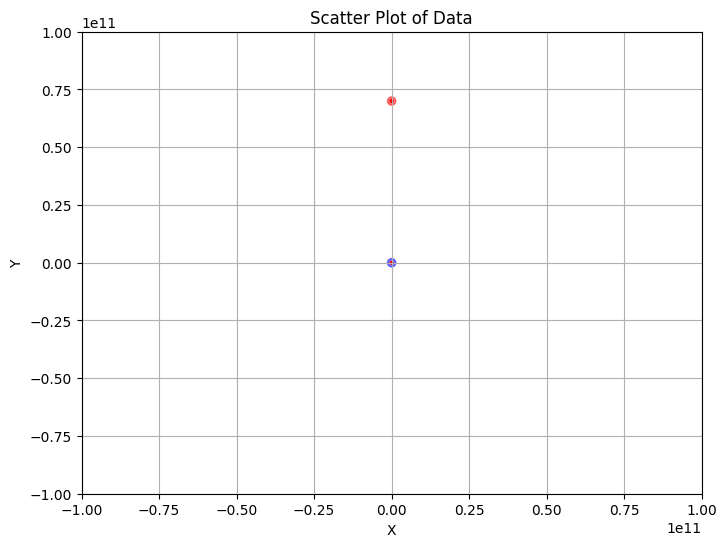

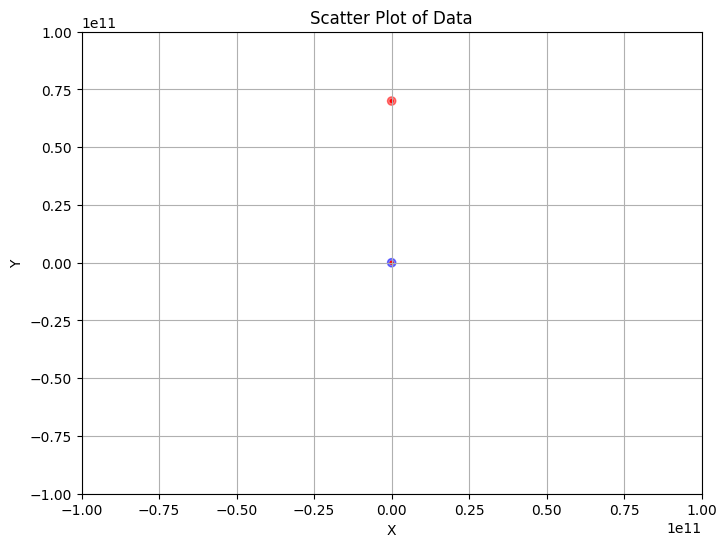

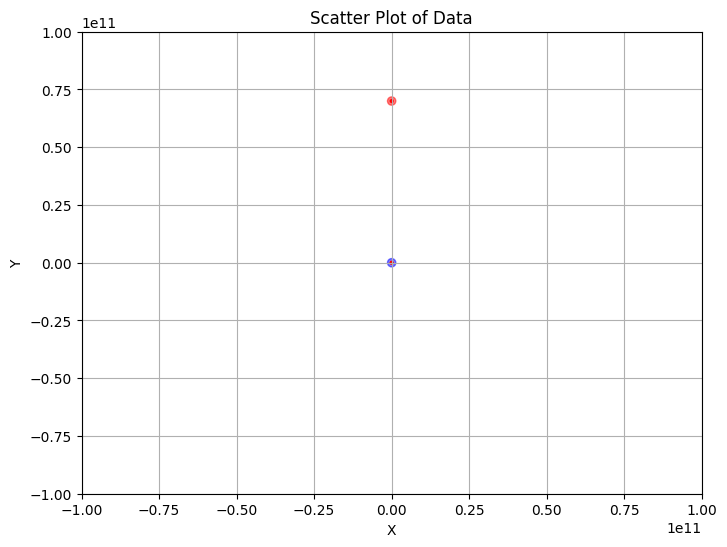

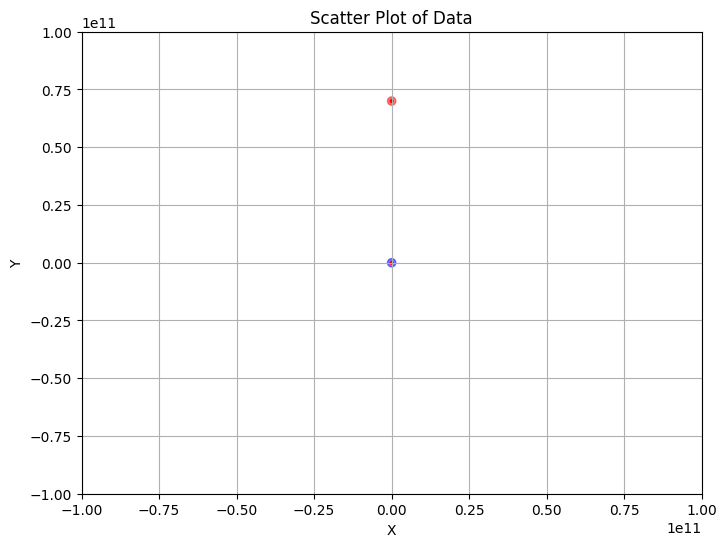

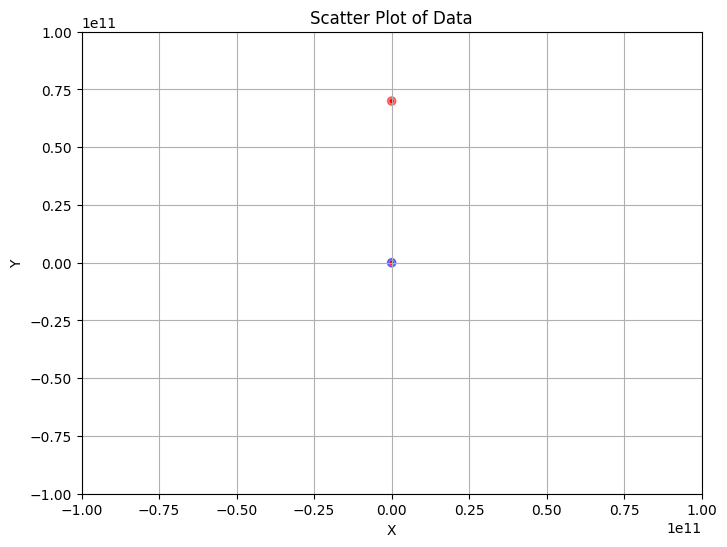

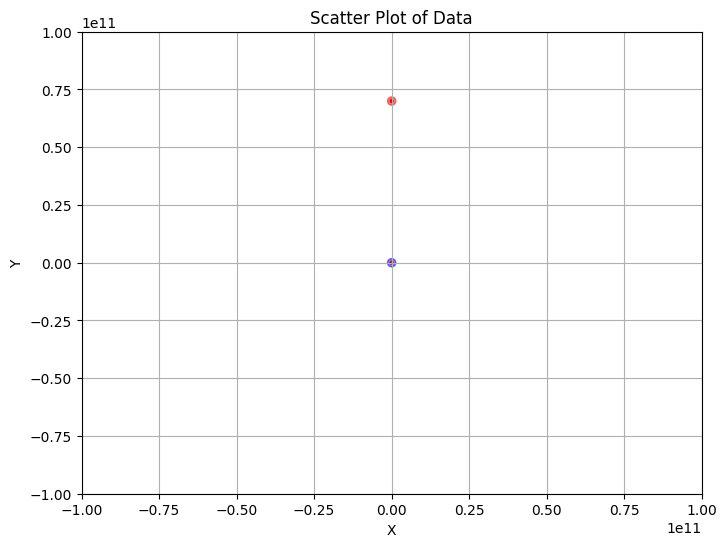

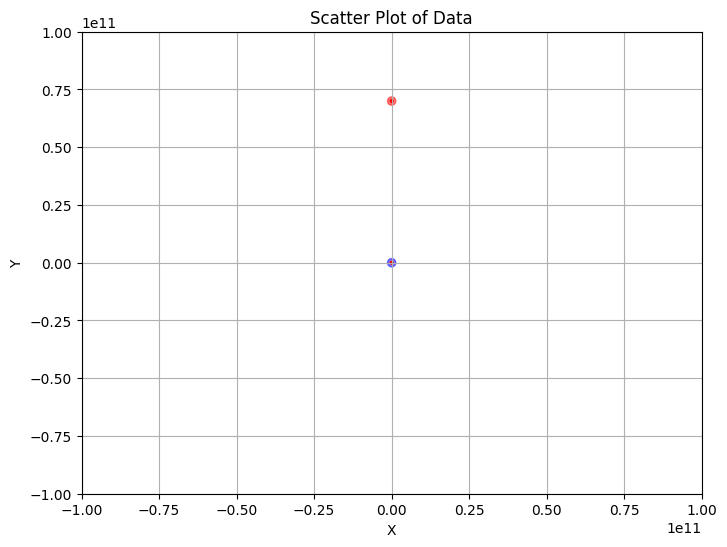

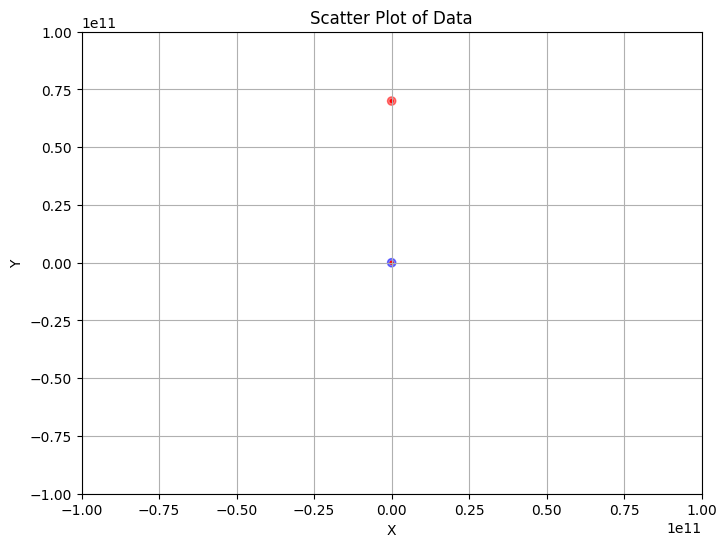

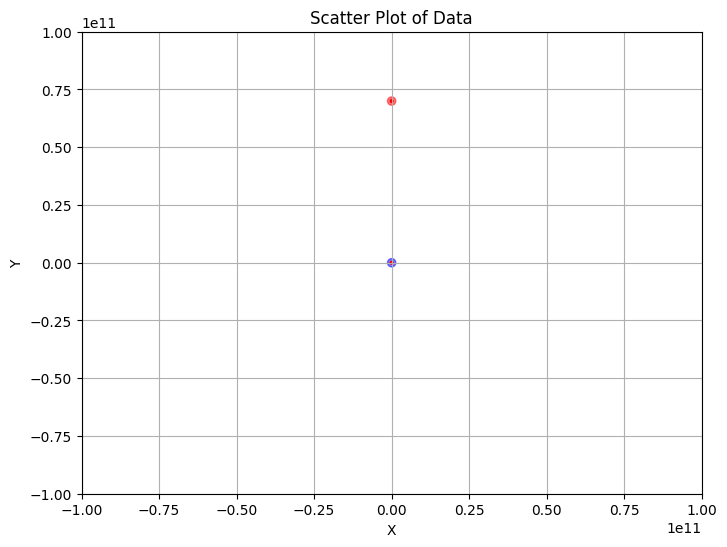

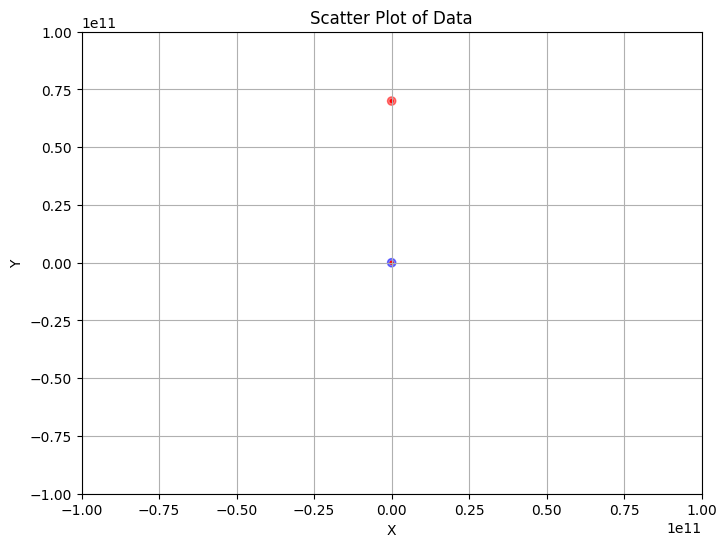

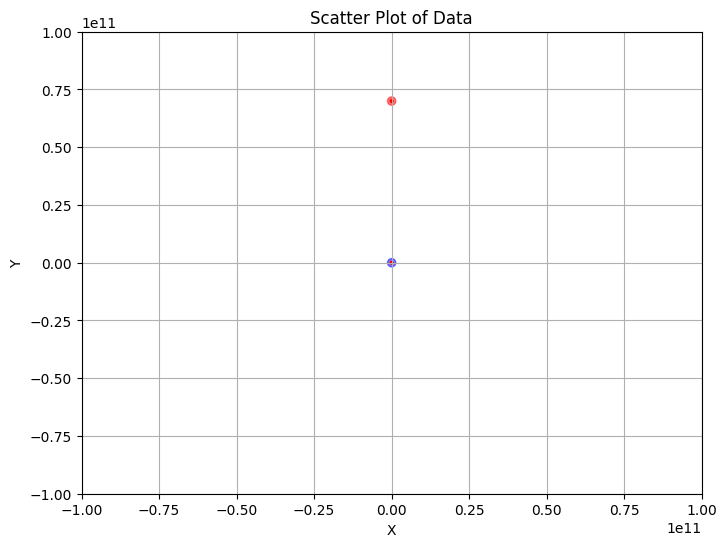

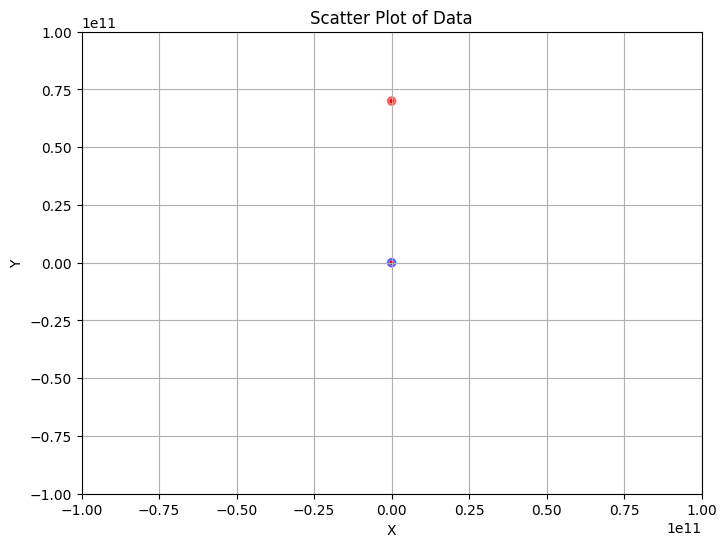

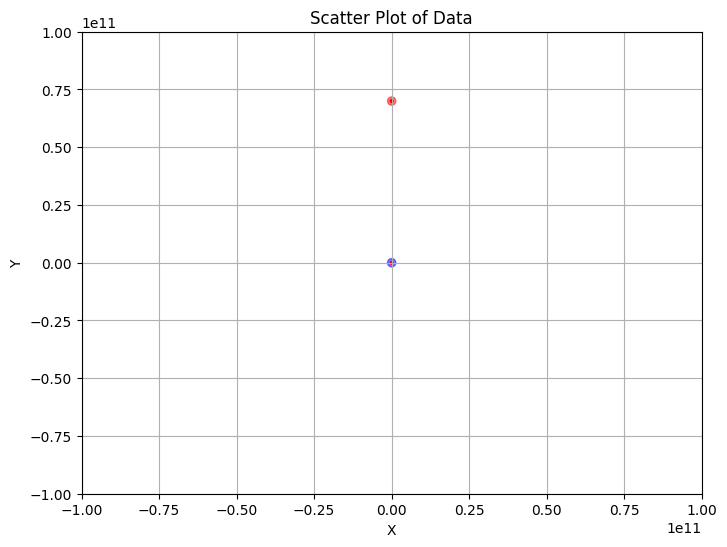

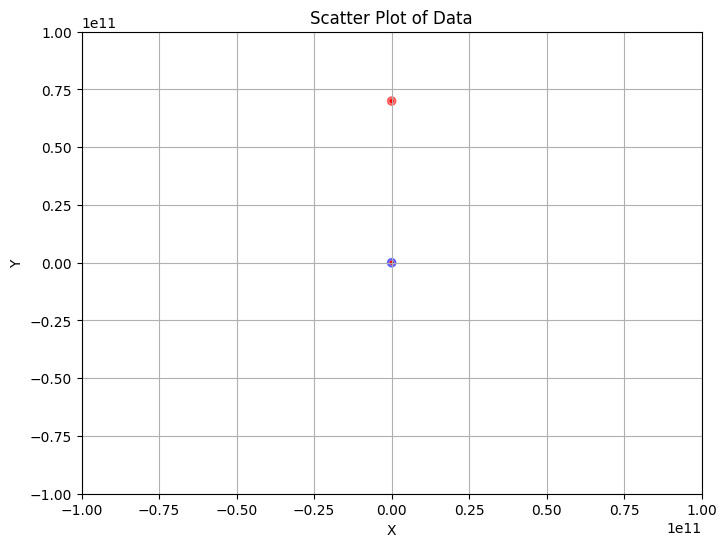

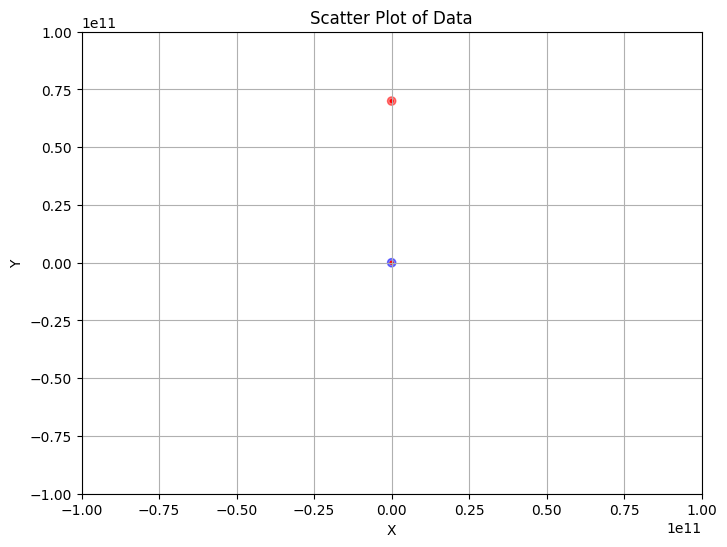

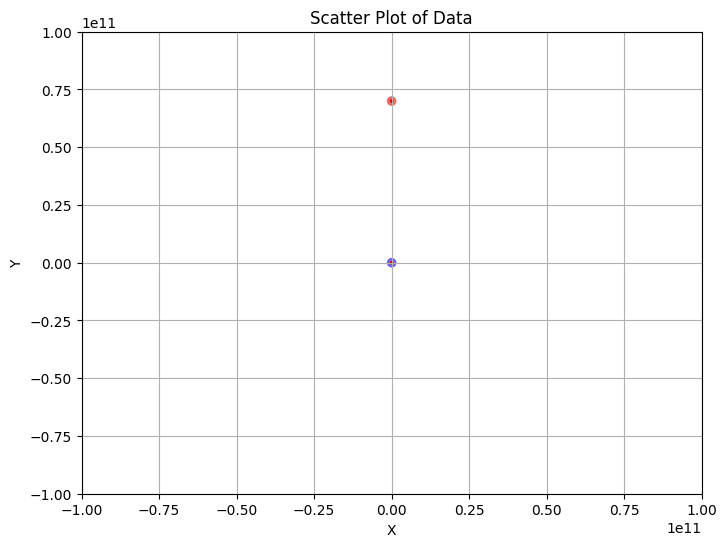

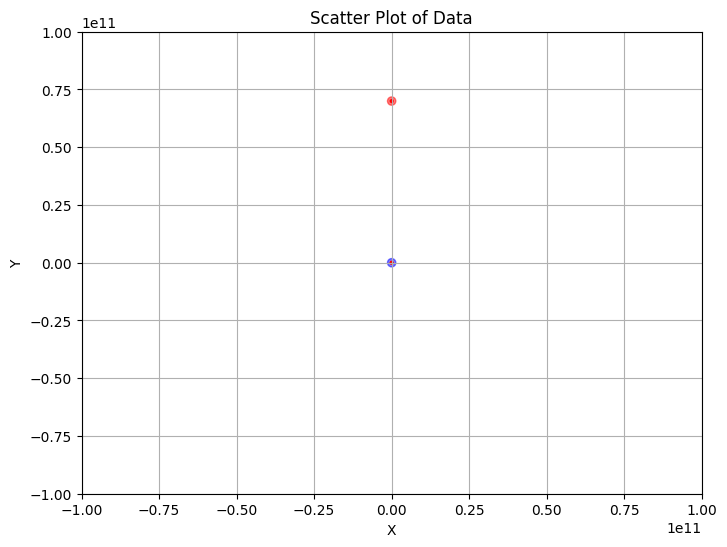

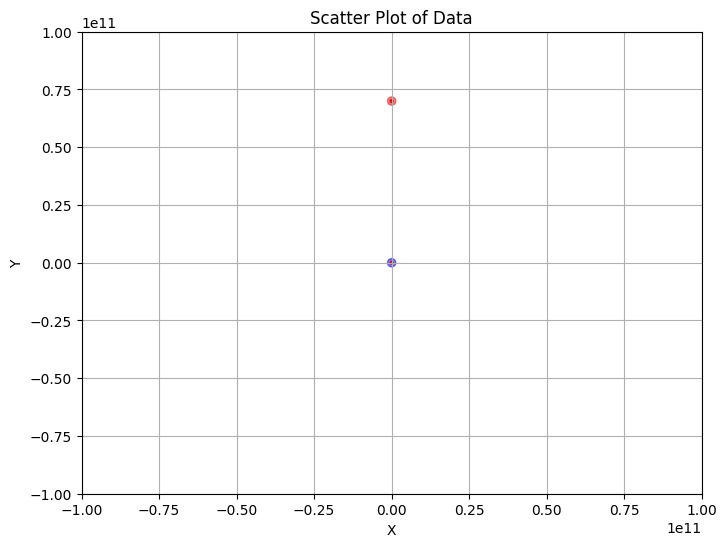

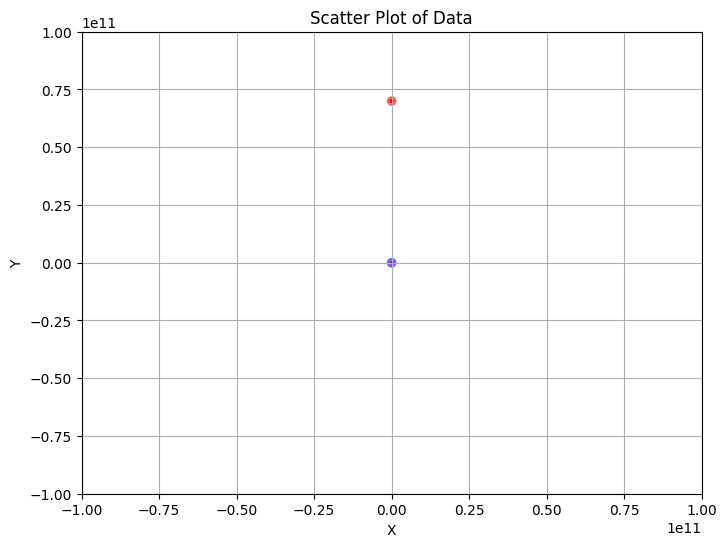

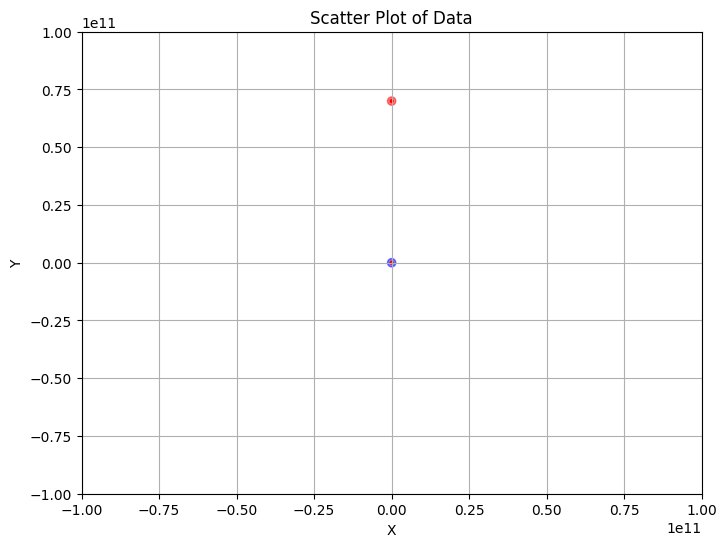

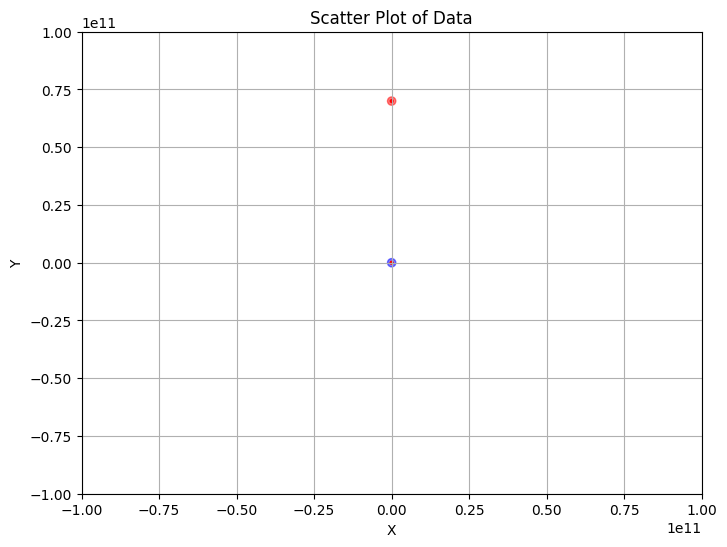

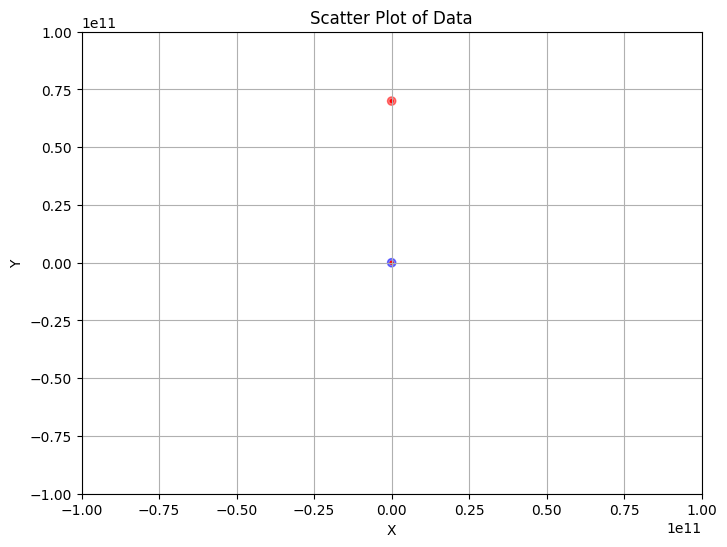

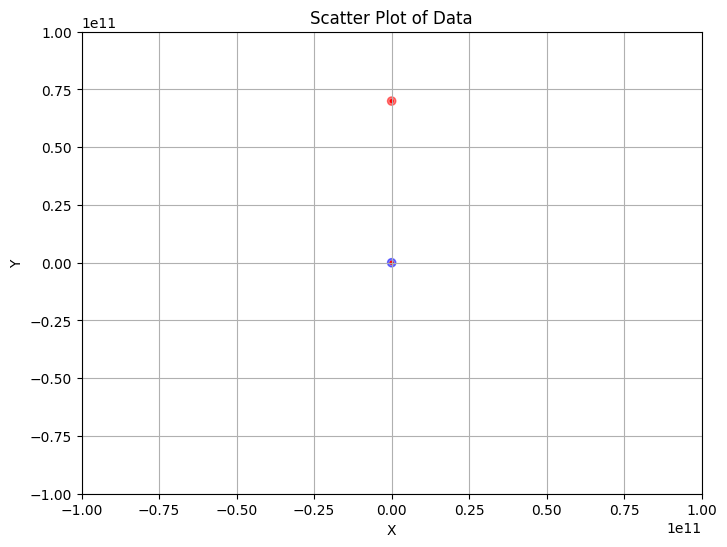

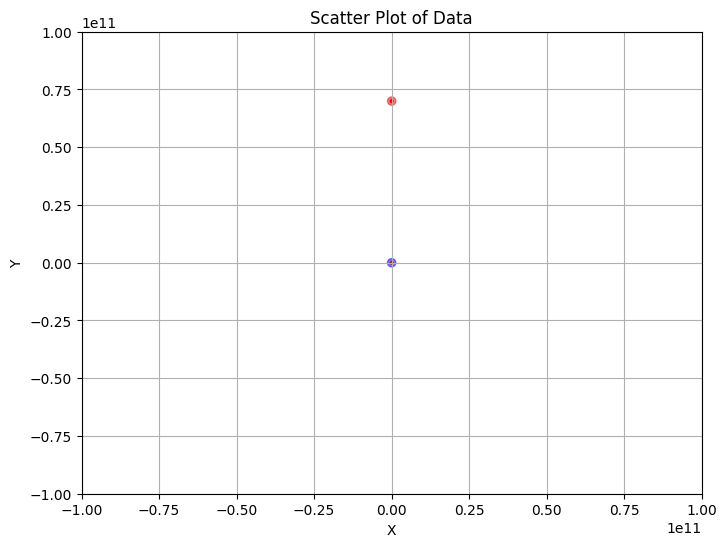

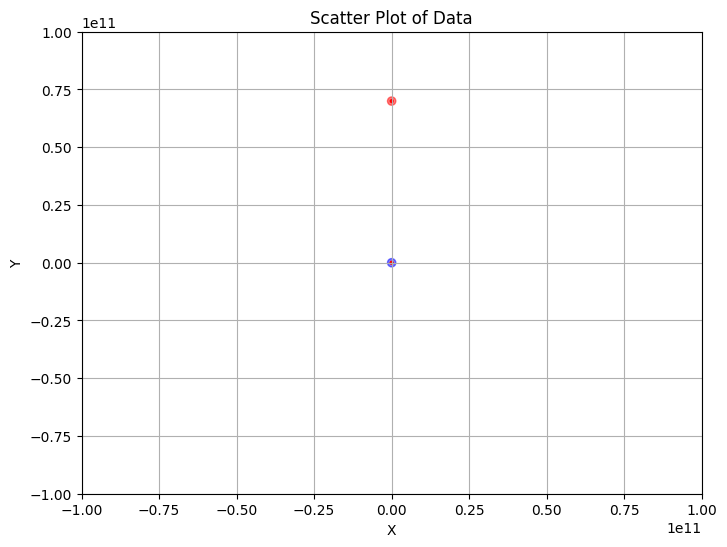

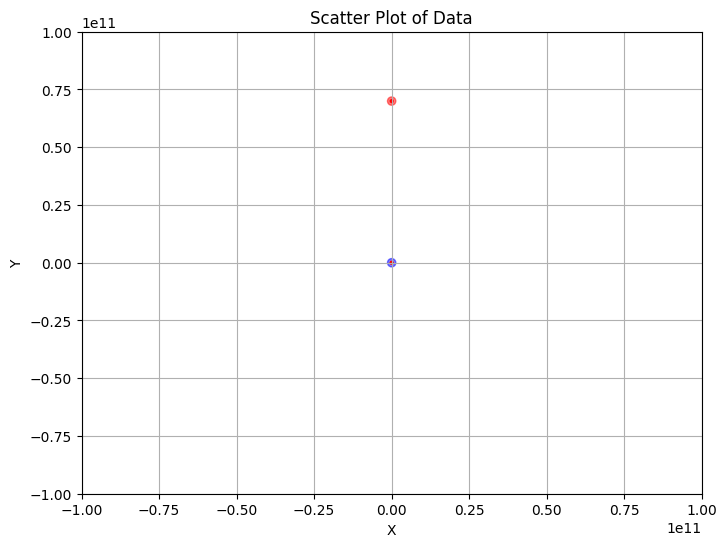

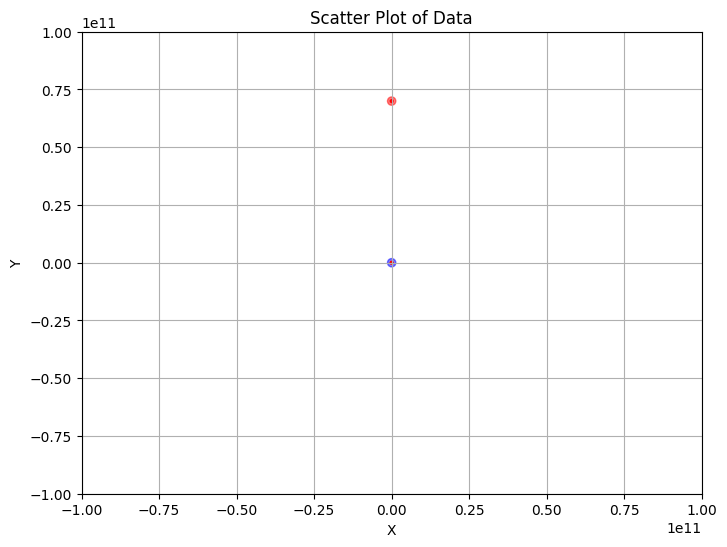

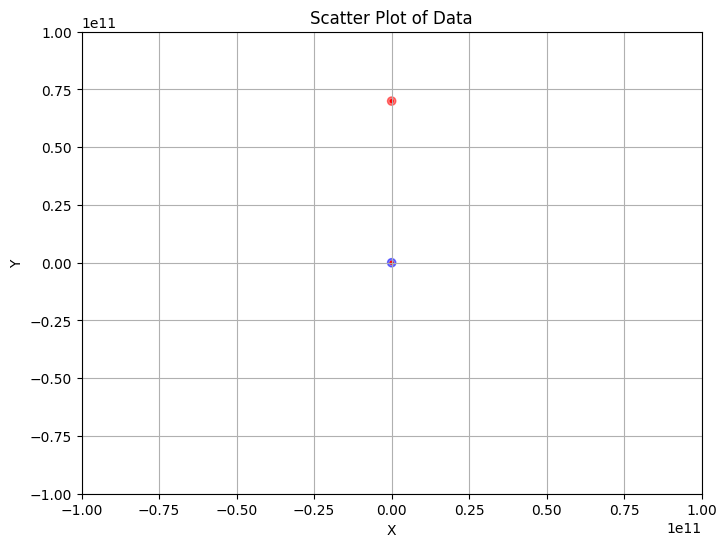

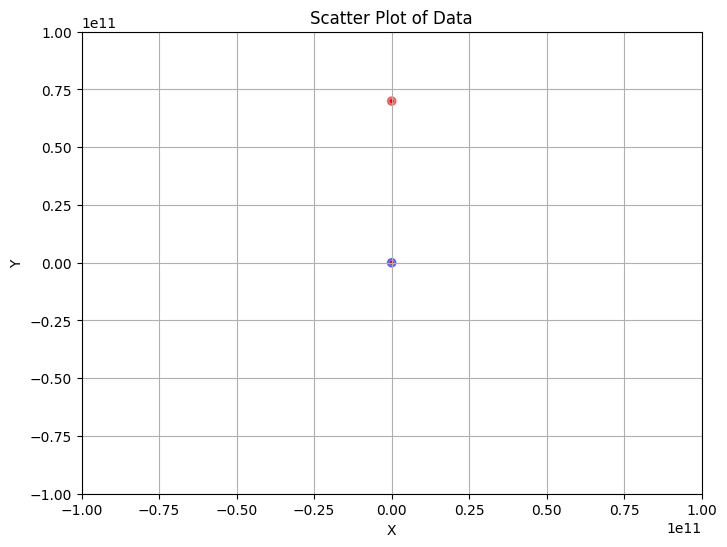

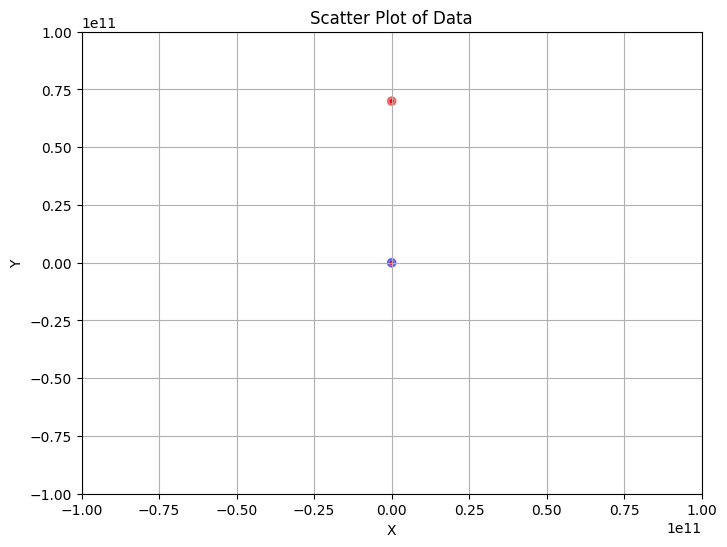

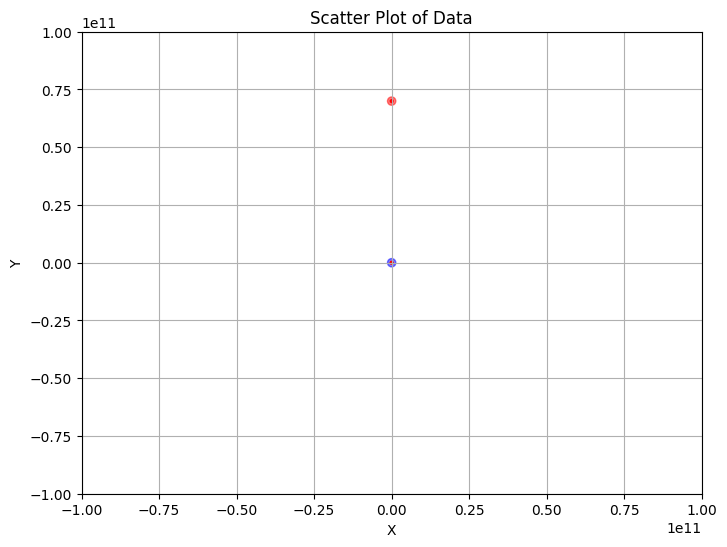

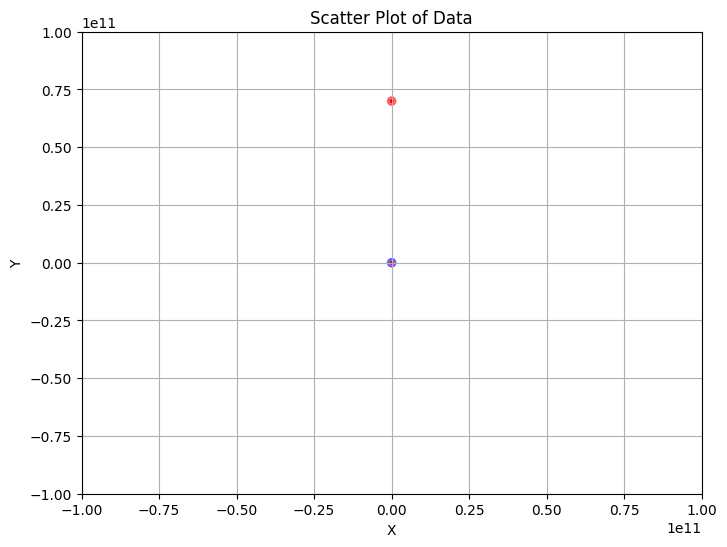

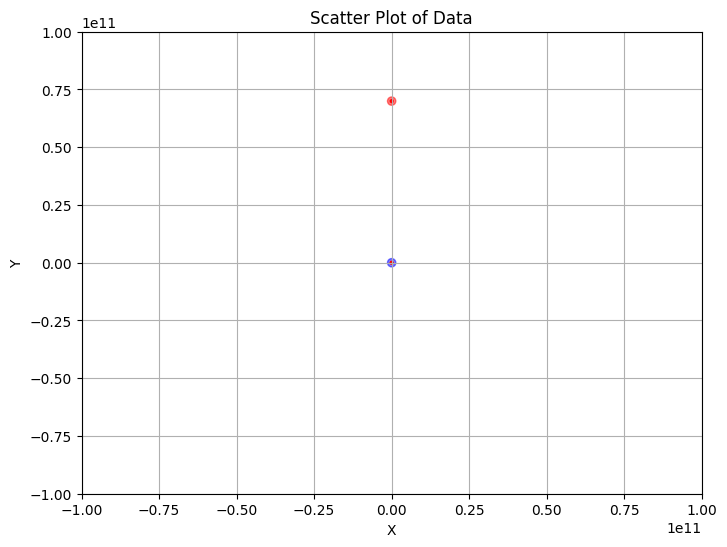

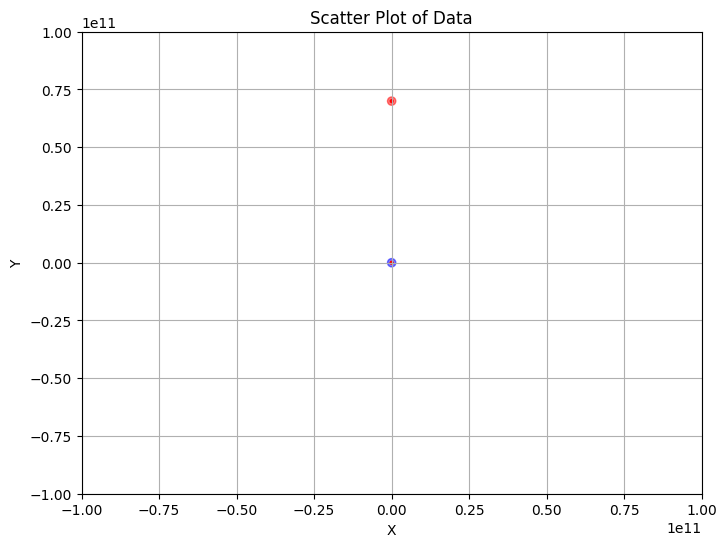

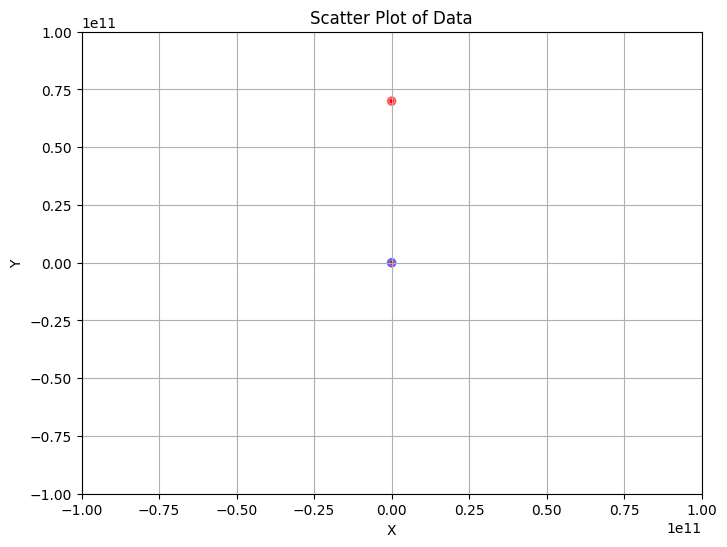

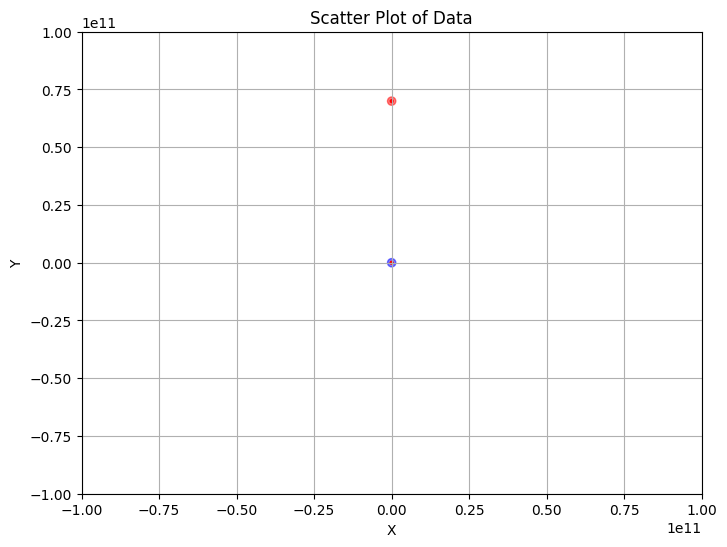

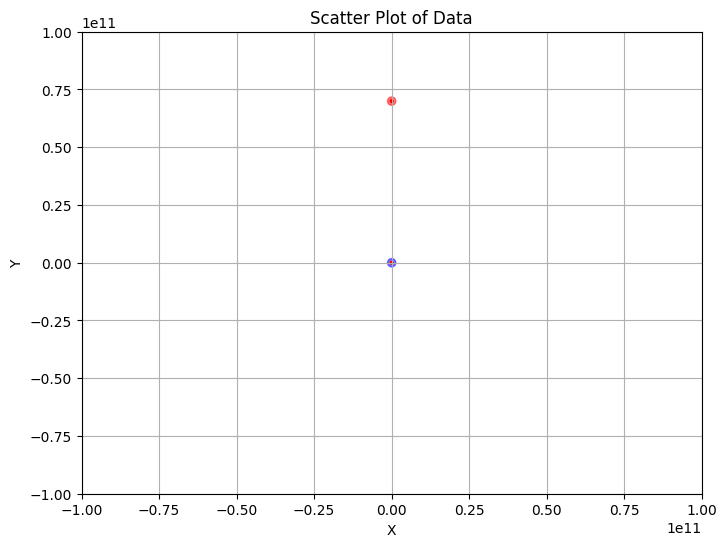

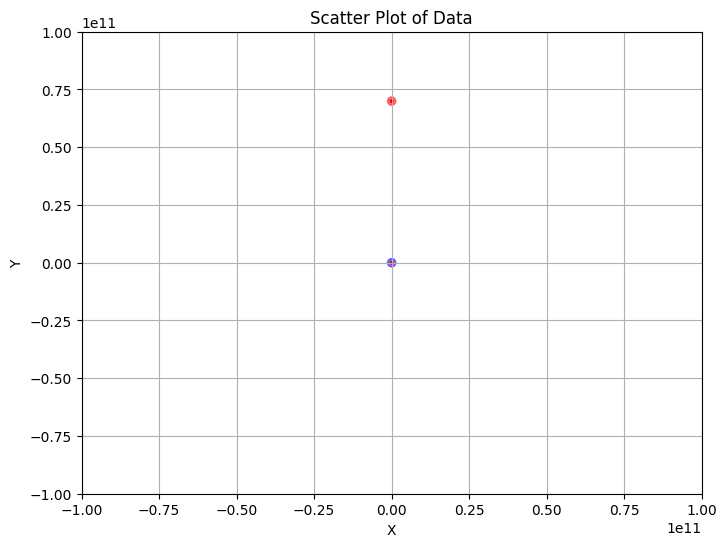

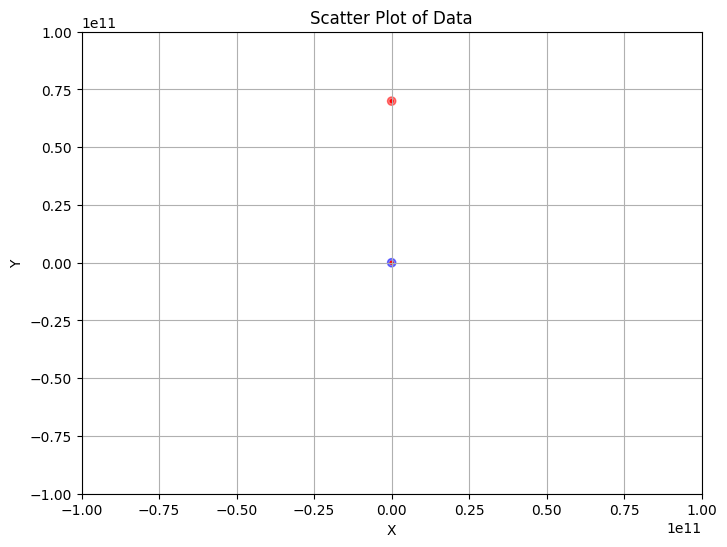

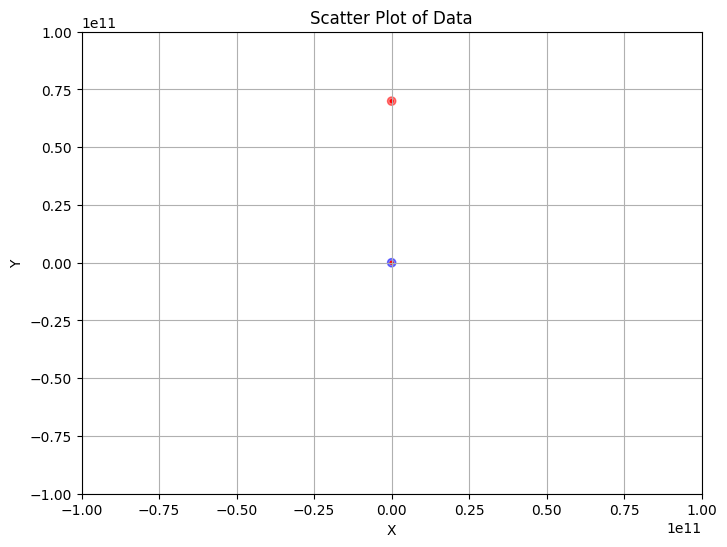

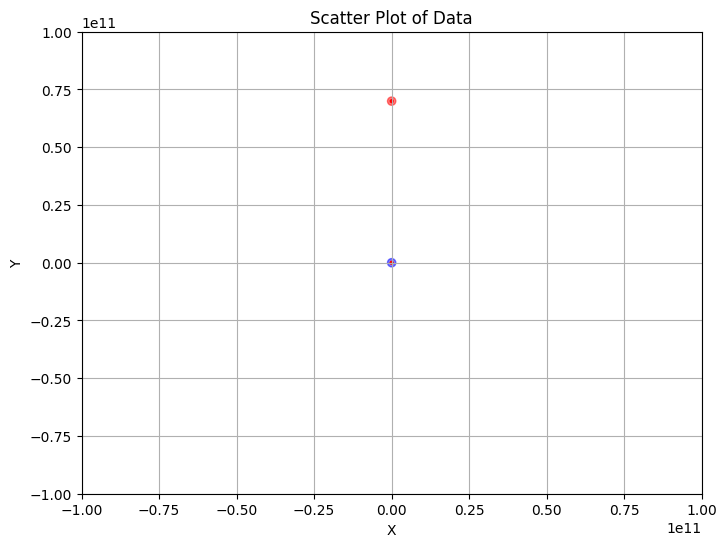

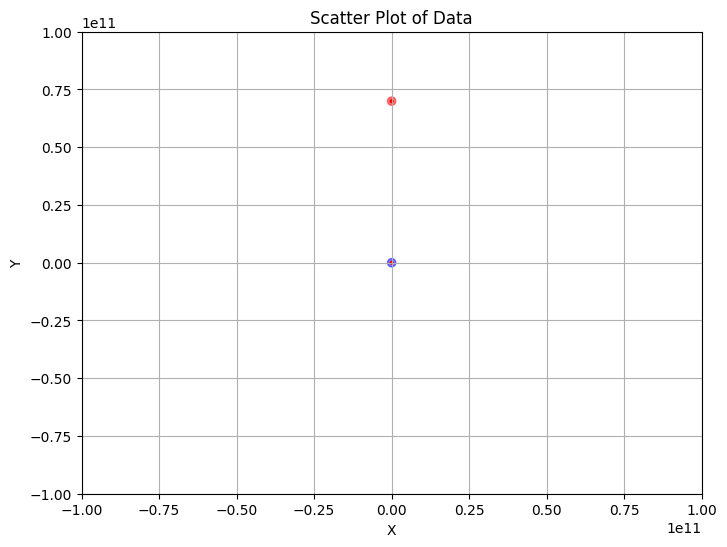

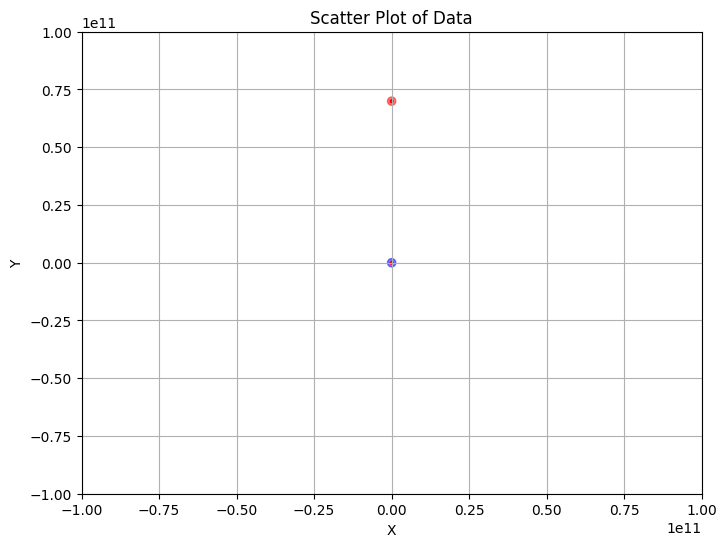

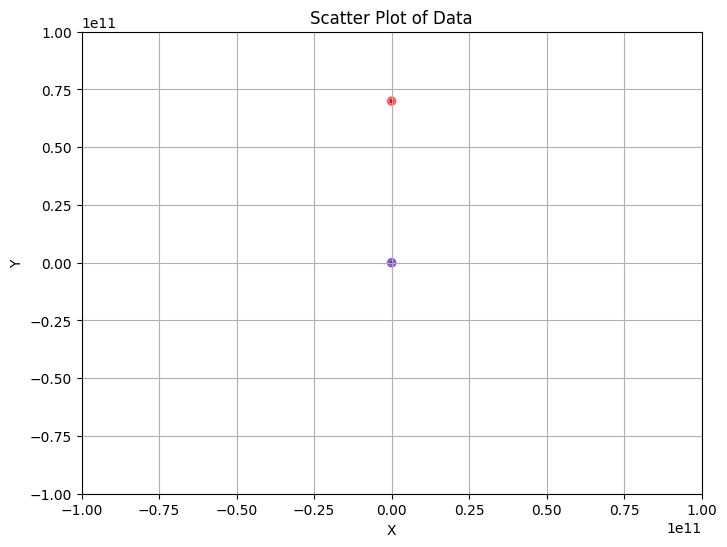

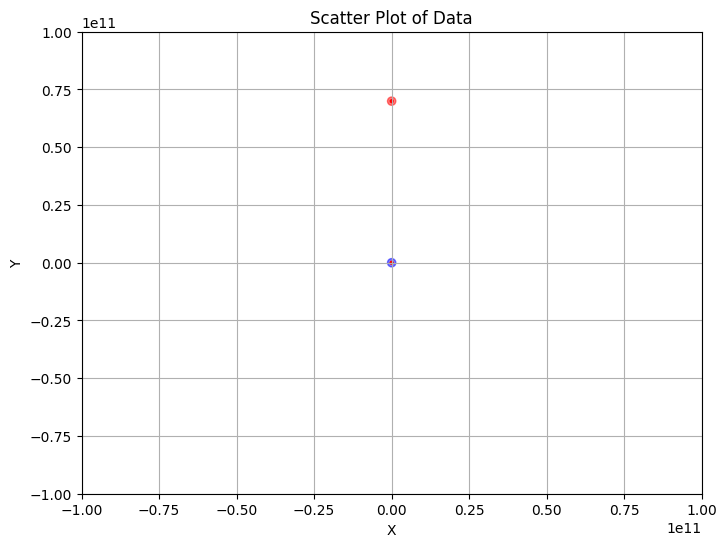

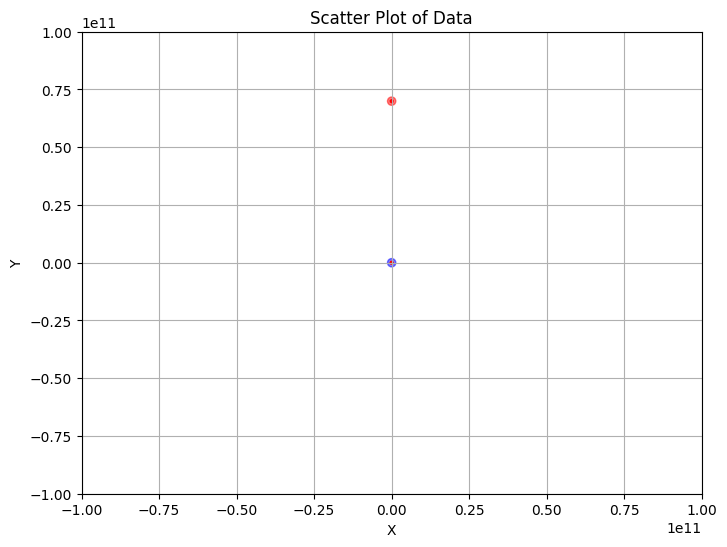

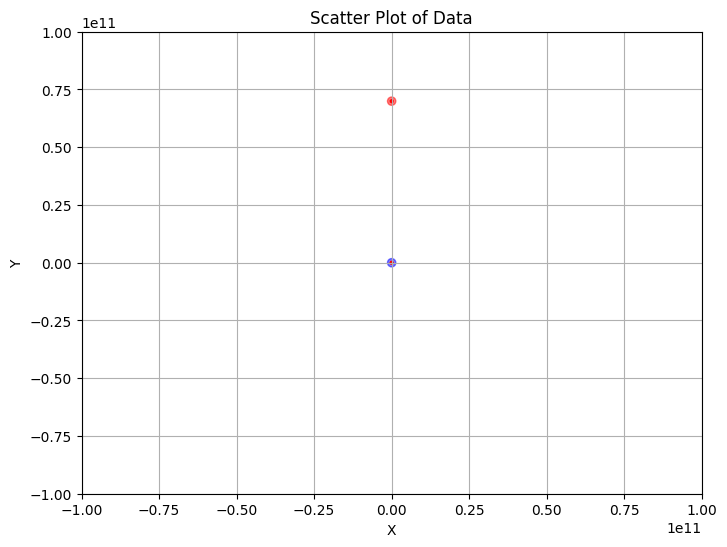

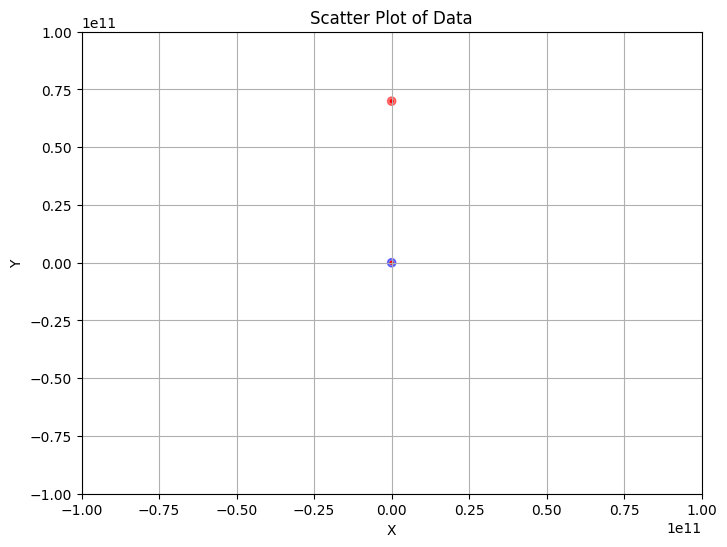

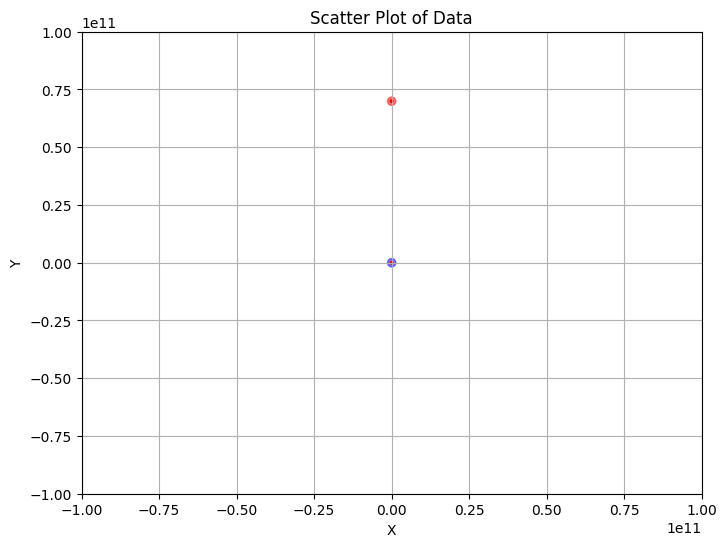

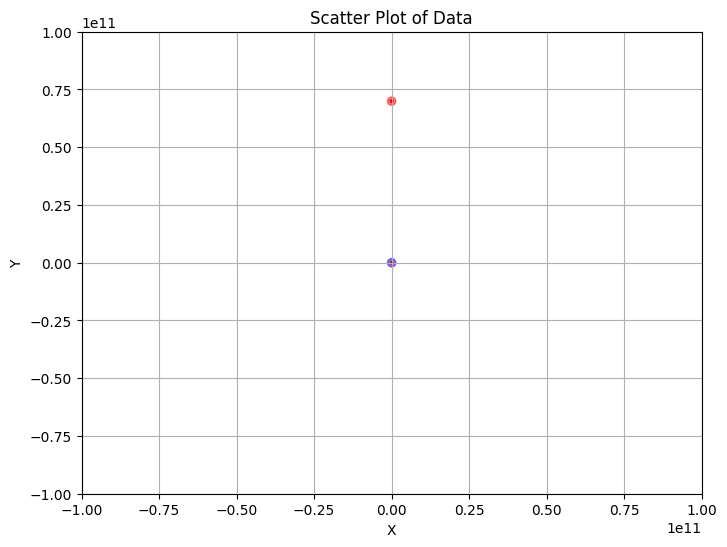

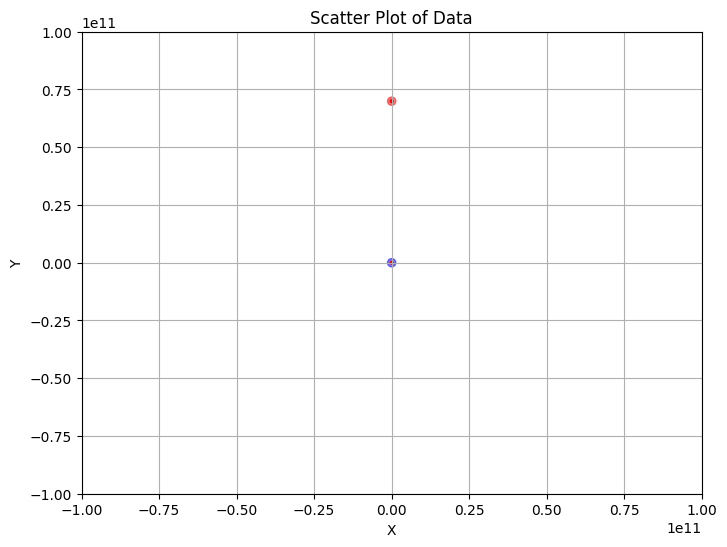

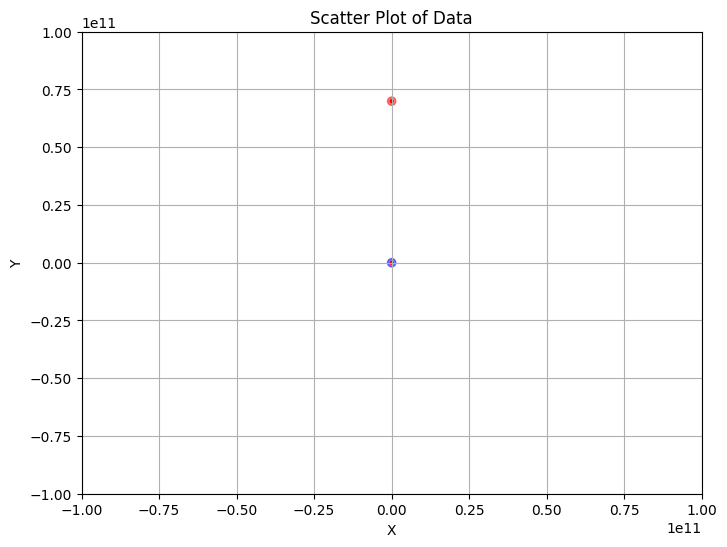

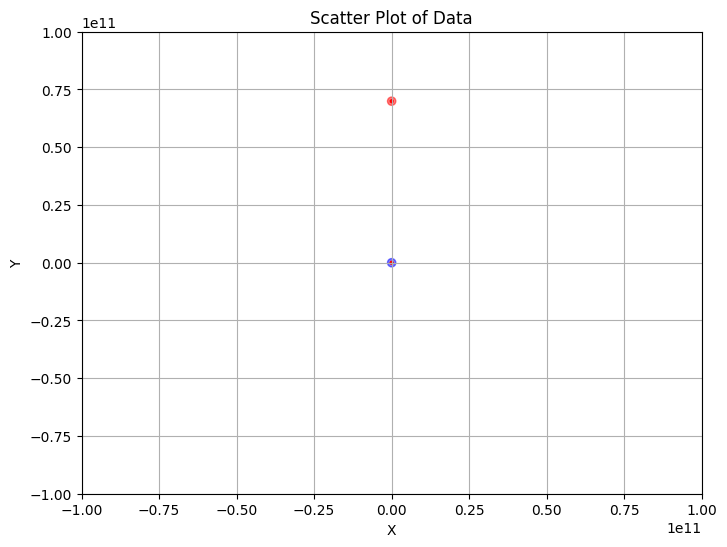

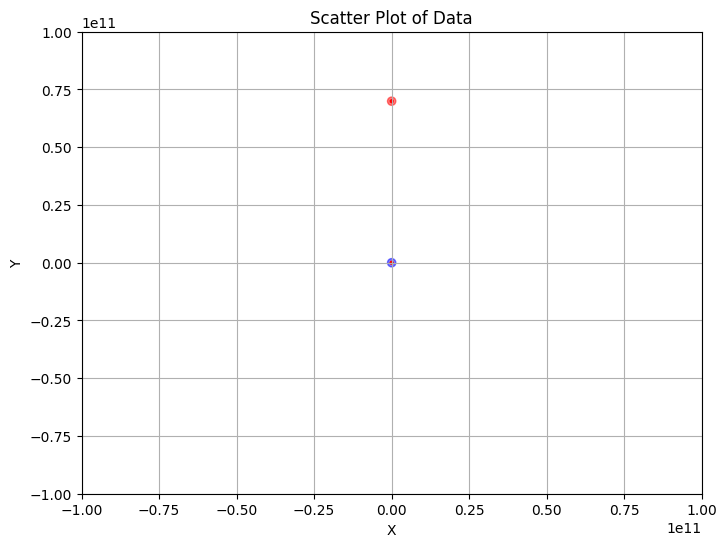

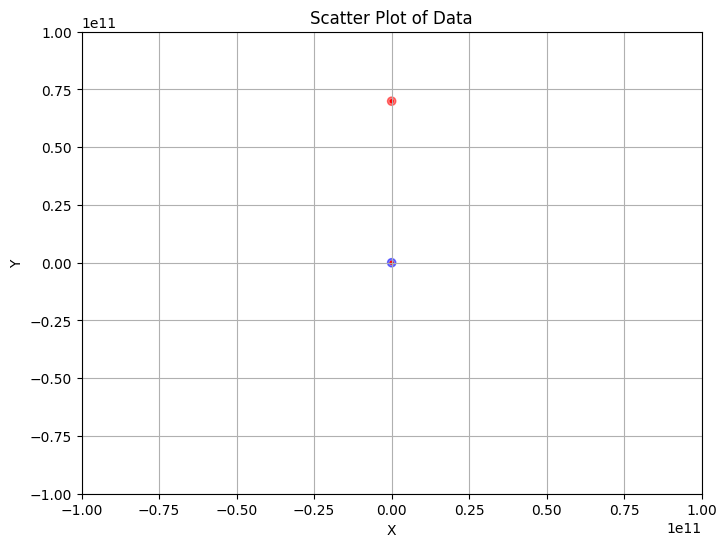

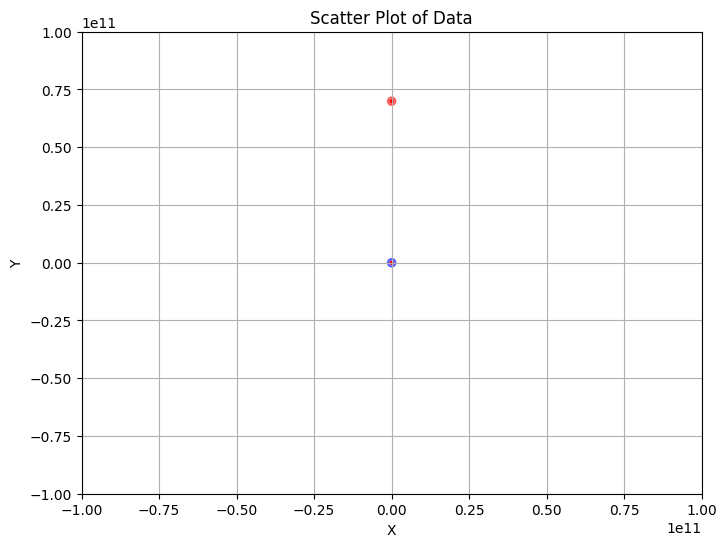

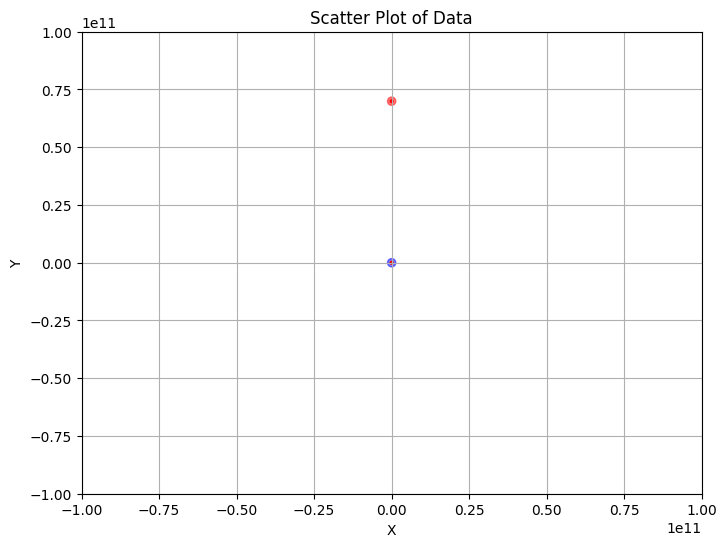

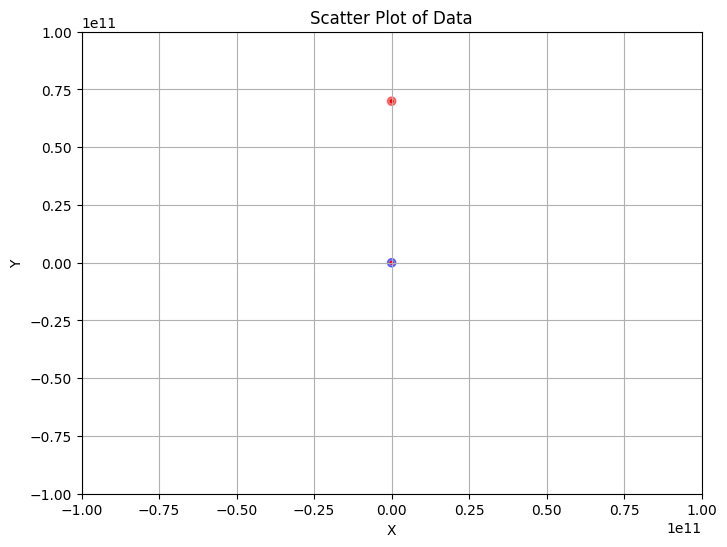

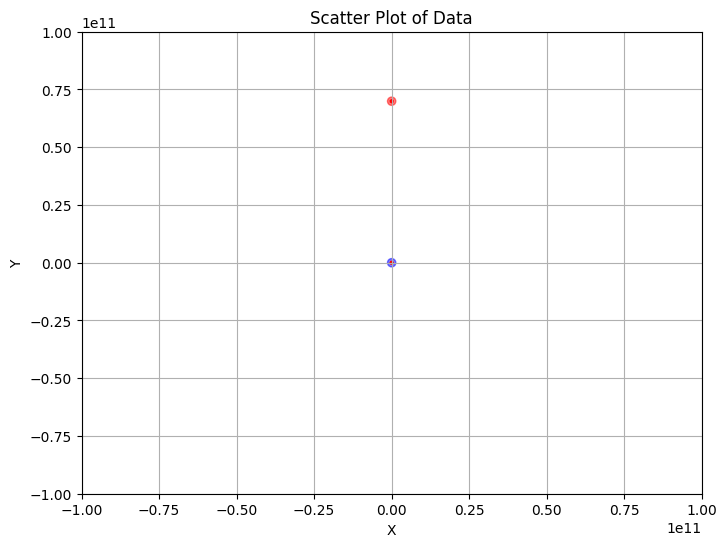

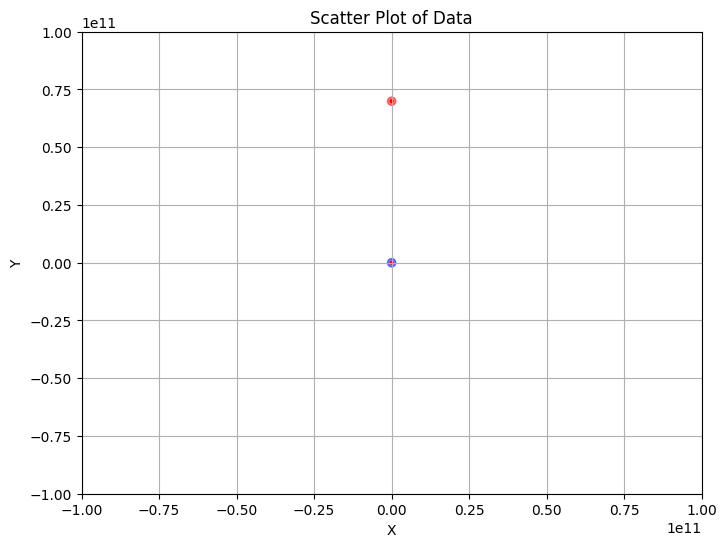

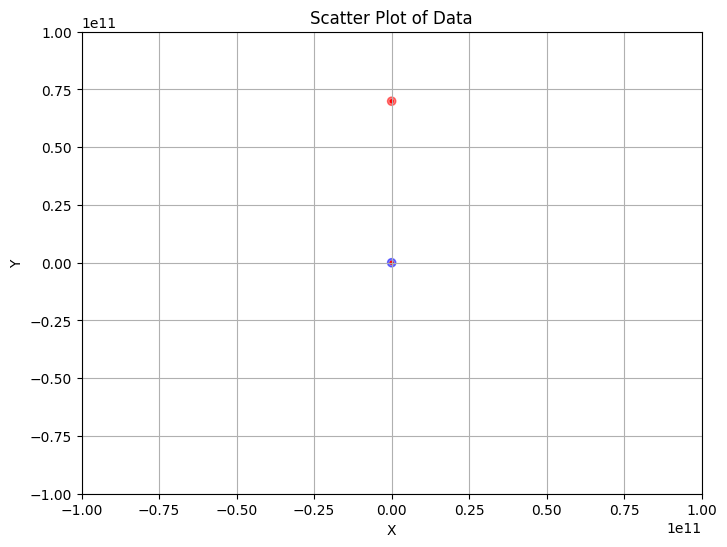

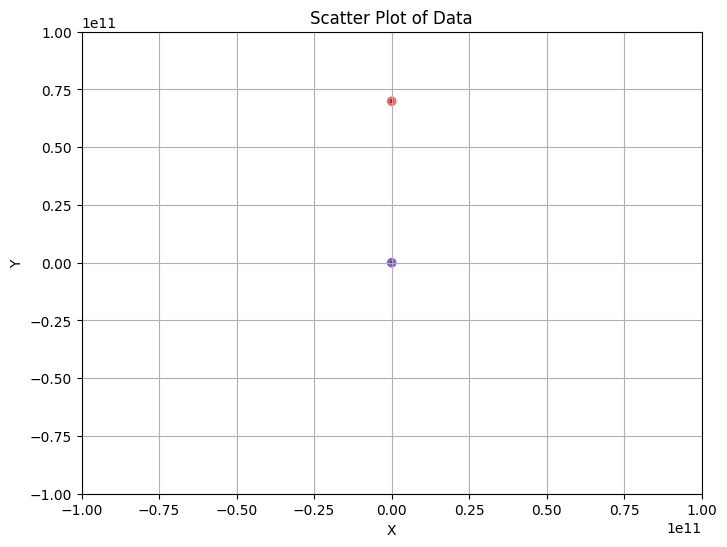

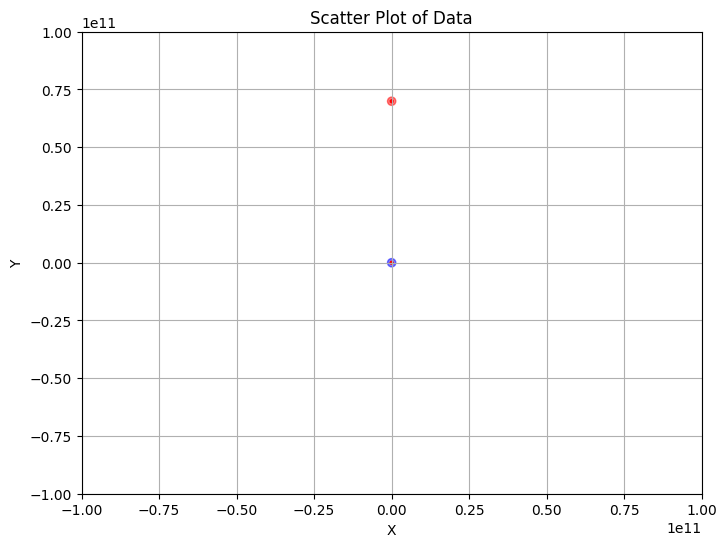

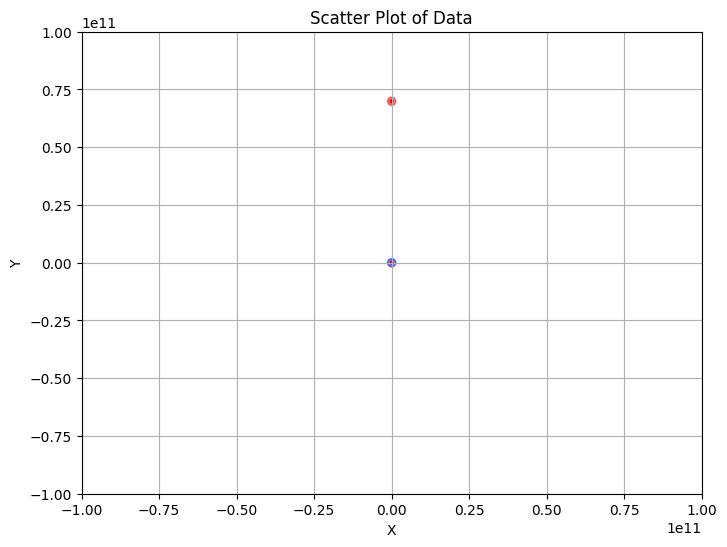

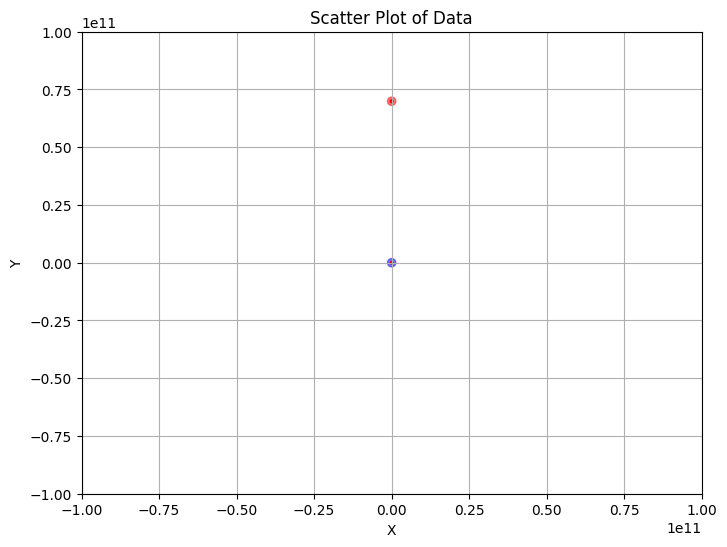

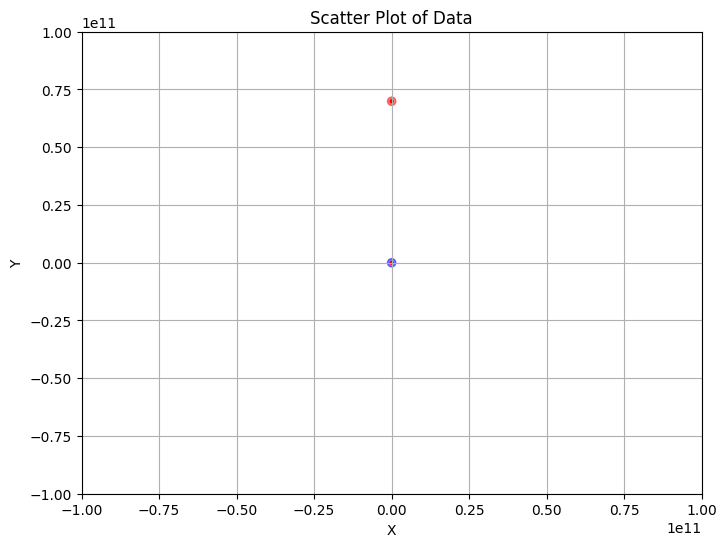

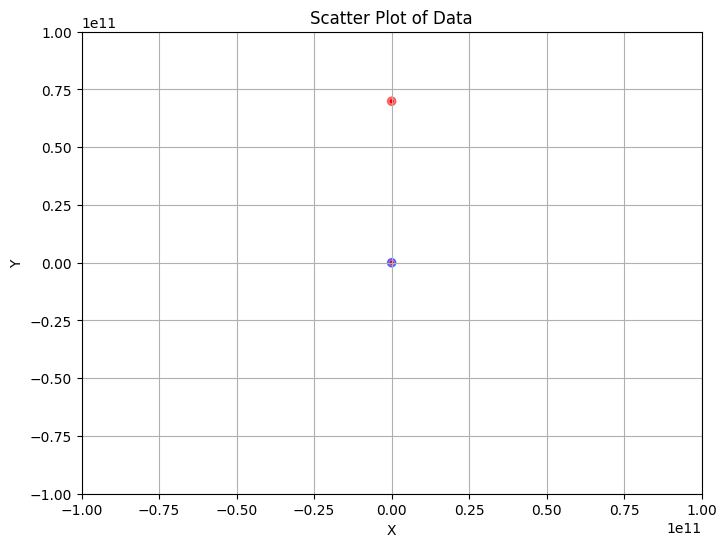

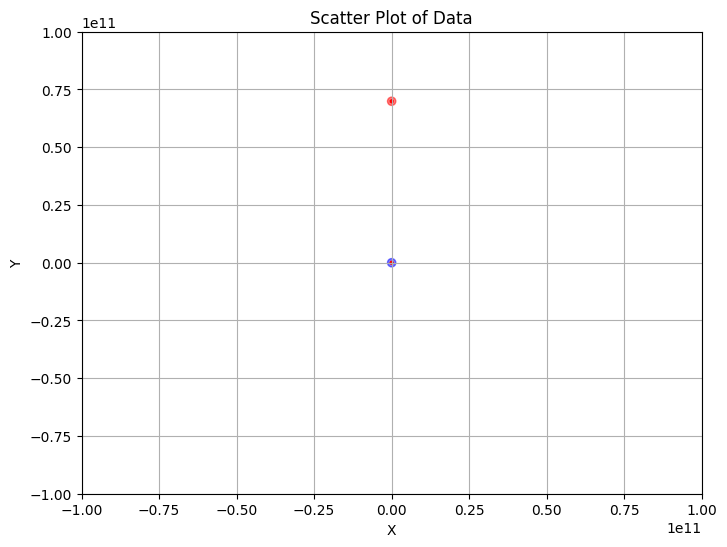

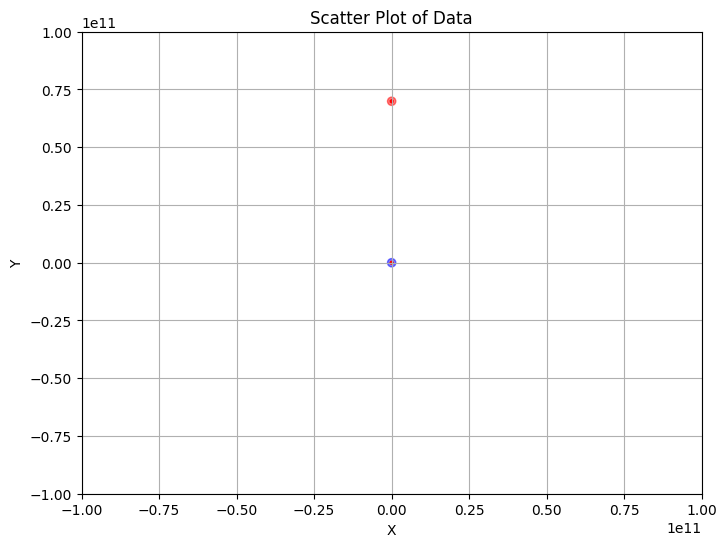

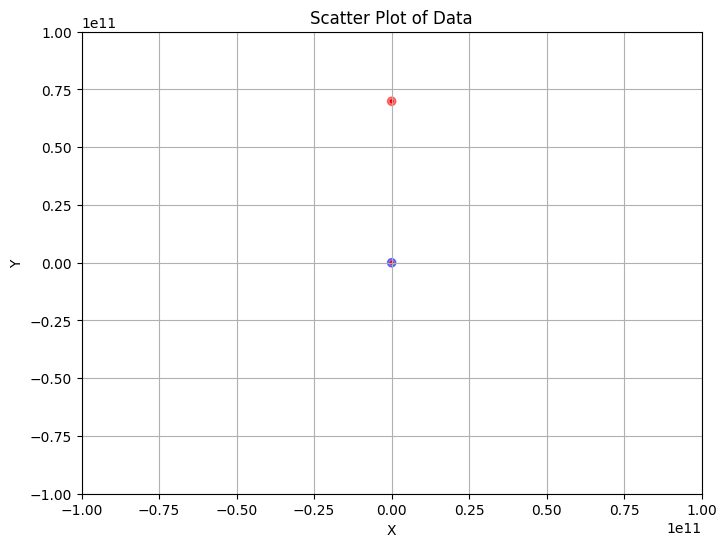

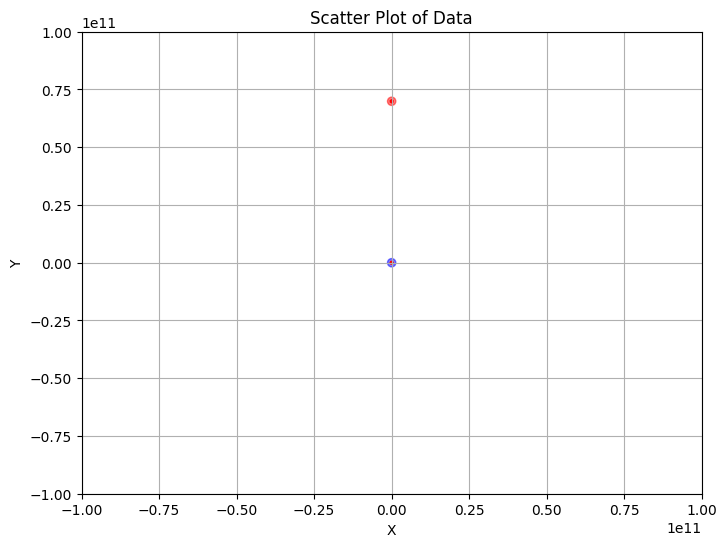

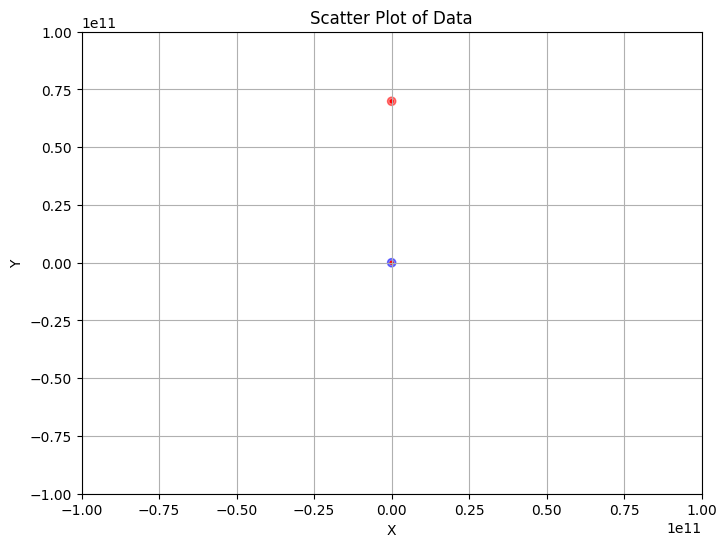

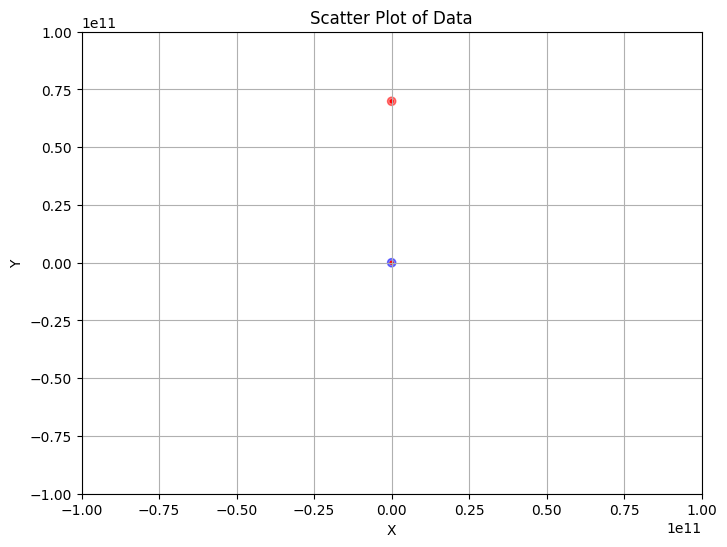

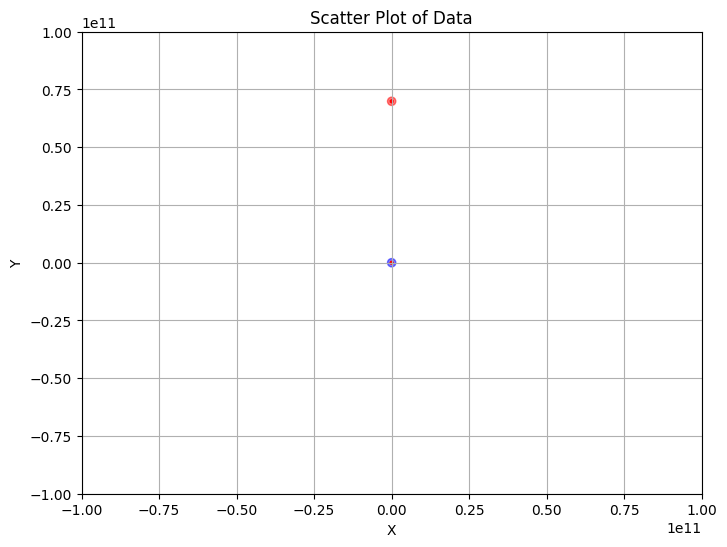

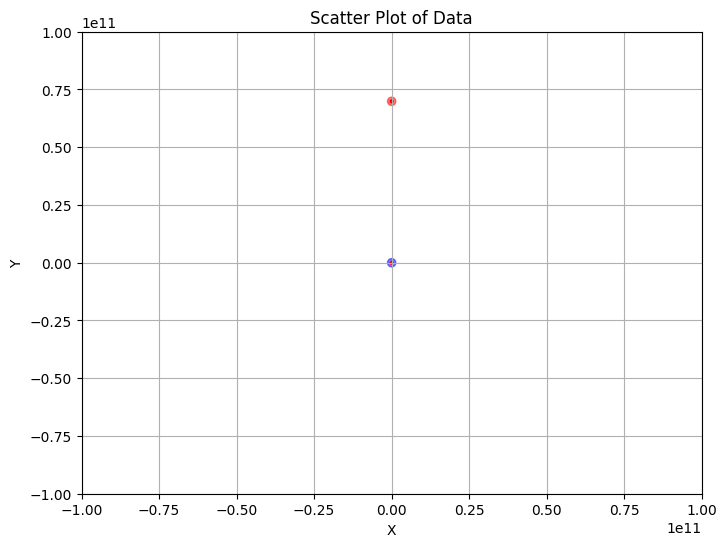

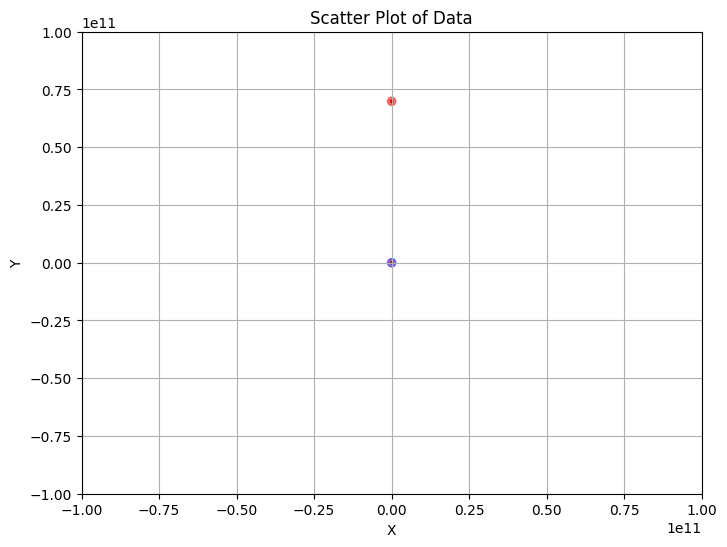

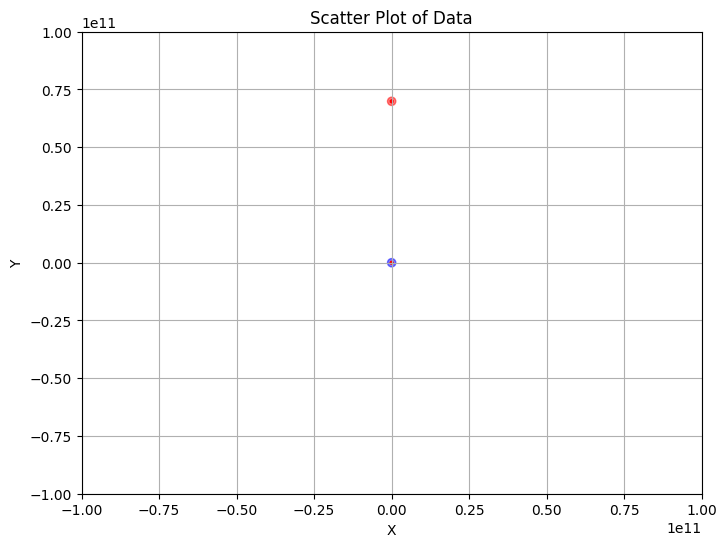

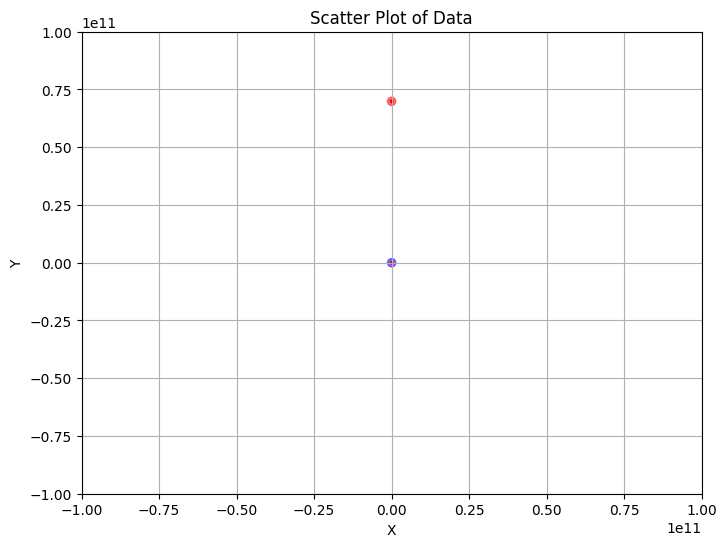

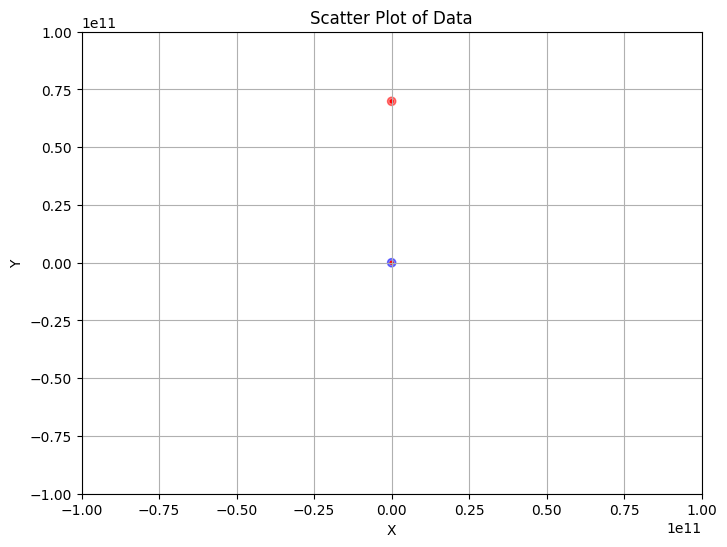

In [116]:
FILE = '../serial_nbodies/data.csv'
read_csv(FILE)